## <p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Churn Prediction and Analysis</p>

<img src="https://raw.githubusercontent.com/HazemAbdelghafar/Customer-Churn-DEPI/main/assets/Label_Image.png" alt="Customer Churn Analysis Illustration">

In this project, I conducted an in-depth analysis of customer behavior using unsupervised machine learning techniques. The goal is to predict potential churn and understand customer segments within a business context. Customer churn refers to when existing customers stop doing business with a company. By identifying patterns in customer data, this analysis helps businesses take proactive steps to retain valuable customers, tailor marketing efforts, and improve overall customer satisfaction.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. Imoprting Libraries](#1)
    
* [2. Data Loading](#2)
    
* [3. Data Preprocessing](#3)   
    
* [4. Dimensionality Reduction](#4)
      
* [5. Clustering](#5)
    
* [6. EVALUATING MODELS](#6)
    
* [7. PROFILING](#7)
    

<a id="1"></a>
## <p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Imoprting Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pickle import dump
import plotly.express as px
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import boxcox, chi2_contingency, ttest_ind, f_oneway
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve,RocCurveDisplay, ConfusionMatrixDisplay

<a id="2"></a>
## <p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data Loading</p>

In [2]:
data=pd.read_csv("./data/churn.csv")

In [3]:
data.head()

age gender security_no region_category  membership_category joining_date  \
0   18      F     XW0DQ7H         Village  Platinum Membership   17-08-2017   
1   32      F     5K0N3X1            City   Premium Membership   28-08-2017   
2   44      F     1F2TCL3            Town        No Membership   11-11-2016   
3   37      M     VJGJ33N            City        No Membership   29-10-2016   
4   31      F     SVZXCWB            City        No Membership   12-09-2017   

  joined_through_referral referral_id     preferred_offer_types  \
0                      No    xxxxxxxx     Gift Vouchers/Coupons   
1                       ?    CID21329     Gift Vouchers/Coupons   
2                     Yes    CID12313     Gift Vouchers/Coupons   
3                     Yes     CID3793     Gift Vouchers/Coupons   
4                      No    xxxxxxxx  Credit/Debit Card Offers   

  medium_of_operation  ... avg_time_spent avg_transaction_value  \
0                   ?  ...         300.63              53005.25   
1             Desktop  ...         306.34              12838.38   
2             Desktop  ...         516.16              21027.00   
3             Desktop  ...          53.27              25239.56   
4          Smartphone  ...         113.13              24483.66   

   avg_frequency_login_days  points_in_wallet  used_special_discount  \
0                        17            781.75                    Yes   
1                        10               NaN                    Yes   
2                        22            500.69                     No   
3                         6            567.66                     No   
4                        16            663.06                     No   

  offer_application_preference  past_complaint     complaint_status  \
0                          Yes              No       Not Applicable   
1                           No             Yes               Solved   
2                          Yes             Yes  Solved in Follow-up   
3                          Yes             Yes             Unsolved   
4                          Yes             Yes               Solved   

                   feedback churn_risk_score  
0  Products always in Stock                0  
1     Quality Customer Care                0  
2              Poor Website                1  
3              Poor Website                1  
4              Poor Website                1  

[5 rows x 23 columns]

<style>
  /* Outer wrapper */
  .feature-overview {
    background: #f5f0e1;
    padding: 24px;
    border-radius: 14px;
    font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, sans-serif;
    line-height: 1.4;
  }
  /* Title */
  .feature-overview h1 {
    color: #003f5c;
    margin-bottom: 16px;
  }
  /* Grid container */
  .feature-grid {
    display: grid;
    grid-template-columns: repeat(auto-fit, minmax(280px, 1fr));
    gap: 16px;
  }
  /* Each card */
  .feature-group {
    background: #ffffff;
    border-left: 6px solid #a6d8ff;
    padding: 16px;
    border-radius: 8px;
    box-shadow: 0 2px 6px rgba(0,0,0,0.08);
  }
  .feature-group h3 {
    margin: 0 0 8px;
    color: #004e7c;
    font-size: 1.1em;
  }
  .feature-group ul {
    margin: 4px 0 0 18px;
    padding: 0;
  }
  .feature-group li {
    margin-bottom: 6px;
  }
  /* Footer link */
  .feature-footer {
    margin-top: 20px;
    font-size: 0.9em;
  }
  .feature-footer a {
    color: #004e7c;
    text-decoration: none;
    border-bottom: 1px dotted #004e7c;
  }
</style>

<div class="feature-overview">

# 🚀 Customer Churn Dataset: Feature Overview

<div class="feature-grid">

  <div class="feature-group">
    <h3>🧑 Personal &amp; ID</h3>
    <ul>
      <li><strong>age</strong></li>
      <li><strong>gender</strong></li>
      <li><strong>security_no</strong></li>
      <li><strong>referral_id</strong></li>
      <li><strong>region_category</strong></li>
    </ul>
  </div>

  <div class="feature-group">
    <h3>📋 Membership</h3>
    <ul>
      <li><strong>membership_category</strong></li>
      <li><strong>joining_date</strong></li>
      <li><strong>joined_through_referral</strong></li>
    </ul>
  </div>

  <div class="feature-group">
    <h3>💻 Engagement</h3>
    <ul>
      <li><strong>last_visit_time</strong></li>
      <li><strong>days_since_last_login</strong></li>
      <li><strong>avg_frequency_login_days</strong></li>
      <li><strong>medium_of_operation</strong></li>
      <li><strong>internet_option</strong></li>
      <li><strong>preferred_offer_types</strong></li>
    </ul>
  </div>

  <div class="feature-group">
    <h3>⌚ Usage &amp; Spend</h3>
    <ul>
      <li><strong>avg_time_spent</strong></li>
      <li><strong>avg_transaction_value</strong></li>
      <li><strong>points_in_wallet</strong></li>
    </ul>
  </div>

  <div class="feature-group">
    <h3>🏷️ Promotions &amp; Discounts</h3>
    <ul>
      <li><strong>used_special_discount</strong></li>
      <li><strong>offer_application_preference</strong></li>
    </ul>
  </div>

  <div class="feature-group">
    <h3>🛠️ Complaints &amp; Feedback</h3>
    <ul>
      <li><strong>past_complaint</strong></li>
      <li><strong>complaint_status</strong></li>
      <li><strong>feedback</strong></li>
    </ul>
  </div>

  <div class="feature-group">
    <h3>🎯 Target</h3>
    <ul>
      <li><strong>churn_risk_score</strong></li>
    </ul>
  </div>

</div>

<div class="feature-footer">
For full attribute details, visit the dataset on  
<a href="https://huggingface.co/datasets/d0r1h/customer_churn" target="_blank">Hugging Face</a>.
</div>
</div>

<a id="3"></a>
# <p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>


**In this section**
* Data Cleaning
* Feature Engineering

In order to, get a full grasp of what steps should I be taking to clean the dataset.
Let us have a look at the information in data.


In [4]:
# Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

**From the above output, we can conclude and note that:**



*  Some columns have missing values, especially region_category, preferred_offer_types, and points_in_wallet. I’ll need to handle those before moving forward, either by filling them in or dropping the rows.

* The joining_date column, which shows when the customer joined, is still in object format. I’ll convert it to datetime so I can use it more effectively later.

* There are several categorical features in the dataset (shown as object dtype), such as gender, membership_category, internet_option, I’ll have to encode these into numeric values so the model can understand them.

* Overall, the dataset has 23 columns and 36,992 rows, which gives me a solid amount of data to work with.

I’ll focus on handling the missing values in the important columns this will be done by replacing the nulls using the right technique based on the data type. For example, numerical columns might be filled with the median, while categorical ones could use the mode. This will be handled in the cleaning step later on, but for now, let’s just focus on understanding our dataset better.









  



In [5]:
# Knowing more about the data Stats
data.describe()

age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          0.540982  
std             19444.806226        194.063624          0.498324  
min               800.460000       -760.661236          0.000000  
25%             14177.540000        616.150000          0.000000  
50%             27554.485000        697.620000          1.000000  
75%             40855.110000        763.950000          1.000000  
max             99914.050000       2069.069761          1.000000

**Dataset Stats Insights:**

1. Age:
   
   Customers range from 10 to 64 years old, with an average age of 37 showing a broad mix of both younger and older users.

2. Login Activity:

   The days_since_last_login column has negative values, which clearly isn’t valid. That’s something I’ll need to handle during data cleaning.

3. User Engagement & Spending:

   While customers spend an average of 243 minutes, the presence of a large negative minimum value means there are likely some data entry issues.
The avg_transaction_value also varies a lot—from 800 to nearly 100,000 which hints at different types of spenders in the customer base.

4. Wallet Points:

   There are missing and even negative values in points_in_wallet. This will require careful handling, possibly with imputation or filtering based on context.

5. Churn Risk Score:

   The target variable is well-balanced (mean ≈ 0.54), which is ideal for classification models.

In [6]:
data.isnull().sum() #Missing Values → region_category, points_in_wallet, preferred_offer_types

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

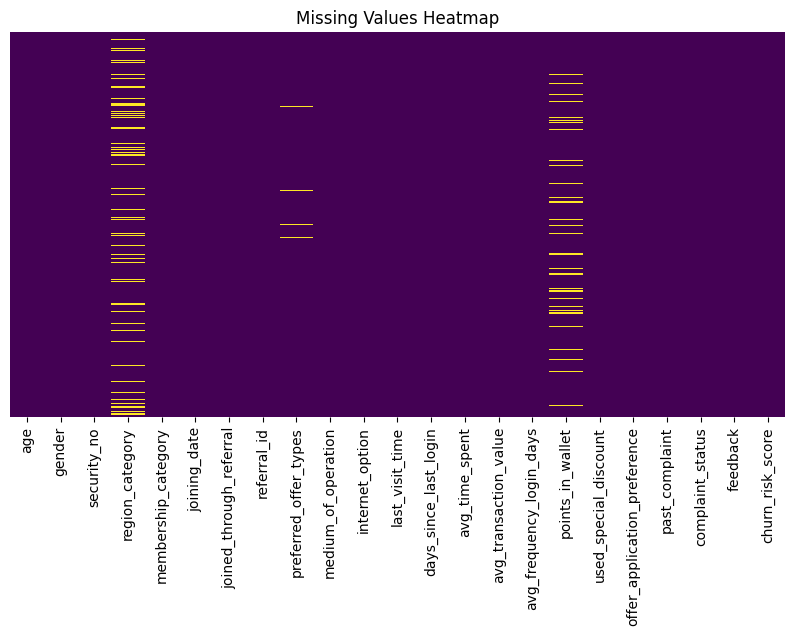

In [7]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
# How many rows and columns
data.shape

(36992, 23)

The data consists of 36992 rows and 23 columns

In [9]:
# Unique Data
for i in data:
    print(i , data[i].unique())

age [18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 48 43 29 10
 20 61 17 12 52 26 49 24 22 36 58 41 50 23 38 35 28 53 55 59 47 54 62 51
 56 27 14 46 15 64 63]
gender ['F' 'M' 'Unknown']
security_no ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category ['Village' 'City' 'Town' nan]
membership_category ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joining_date ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
joined_through_referral ['No' '?' 'Yes']
referral_id ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation ['?' 'Desktop' 'Smartphone' 'Both']
internet_option ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
days_since_last_login [

In [10]:
data.nunique()

age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25960
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [11]:
data = data[data["gender"] != "Unknown"]

In [12]:
data.nunique()

age                                55
gender                              2
security_no                     36933
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11349
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30058
days_since_last_login              27
avg_time_spent                  25927
avg_transaction_value           36835
avg_frequency_login_days         1650
points_in_wallet                23675
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [13]:
def clean_referral(row):
    if row['joined_through_referral'] == '?':
        if pd.notna(row['referral_id']) and 'CID' in str(row['referral_id']):
            return 'Yes'
        else:
            return 'No'
    return row['joined_through_referral']

data['joined_through_referral'] = data.apply(clean_referral, axis=1)

# Verify the changes
print(data['joined_through_referral'].value_counts())

joined_through_referral
Yes    20556
No     16377
Name: count, dtype: int64


In [14]:
data.nunique()

age                                55
gender                              2
security_no                     36933
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
referral_id                     11349
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30058
days_since_last_login              27
avg_time_spent                  25927
avg_transaction_value           36835
avg_frequency_login_days         1650
points_in_wallet                23675
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [15]:
data = data.drop(columns=['security_no'])

In [16]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\n Number of Duplicate Rows: {duplicates}")


 Number of Duplicate Rows: 0


Visualize Feature Distributions

 This helps understand data distributions and detect skewness

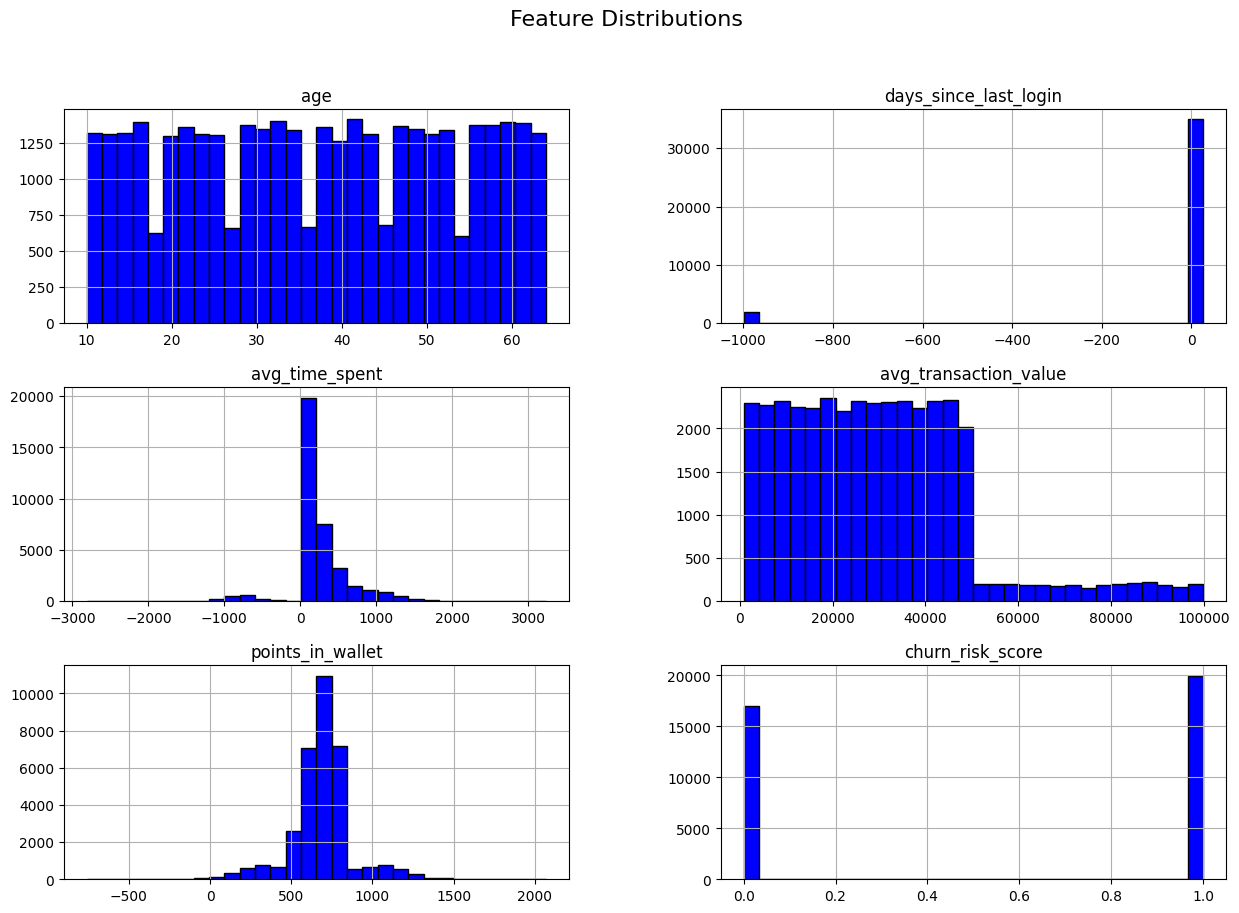

In [17]:
# Plot distributions of numerical features
data.hist(figsize=(15, 10), bins=30, color='blue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Preprocessing and Feature Engineering:

Handle Missing Data:

In [18]:
# Fill missing values for numerical columns with the median
data.fillna(data.median(numeric_only=True), inplace=True)

In [19]:
# Fill missing values for categorical columns with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [20]:
data.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

 Handling Outliers:

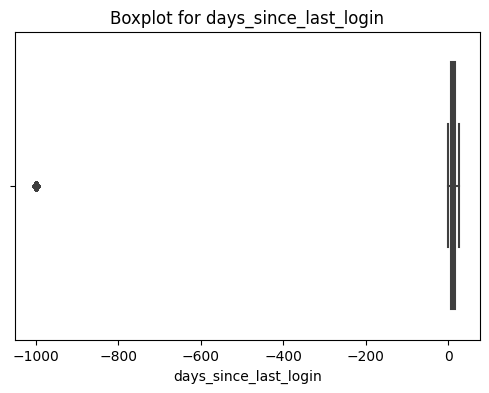

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['days_since_last_login'])
plt.title("Boxplot for days_since_last_login")
plt.show()

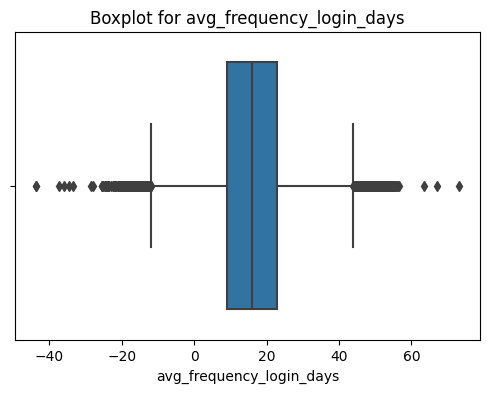

In [22]:
# Convert 'avg_frequency_login_days' to numeric
data['avg_frequency_login_days'] = pd.to_numeric(data['avg_frequency_login_days'], errors='coerce')

plt.figure(figsize=(6, 4))
sns.boxplot(x=data['avg_frequency_login_days'])
plt.title("Boxplot for avg_frequency_login_days")
plt.show()

In [23]:
data['avg_frequency_login_days'] = pd.to_numeric(data['avg_frequency_login_days'], errors='coerce')

In [24]:
data = data[data['avg_frequency_login_days'] >= 0]

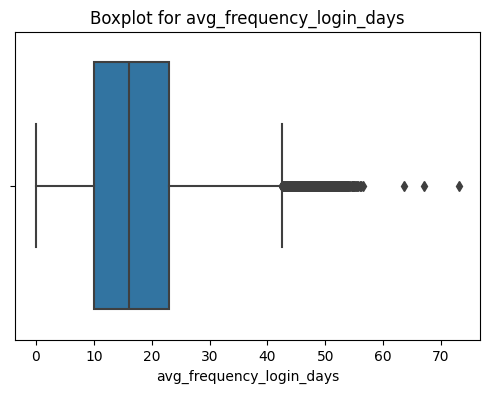

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['avg_frequency_login_days'])
plt.title("Boxplot for avg_frequency_login_days")
plt.show()

In [26]:
data = data[data['days_since_last_login'] >= 0]

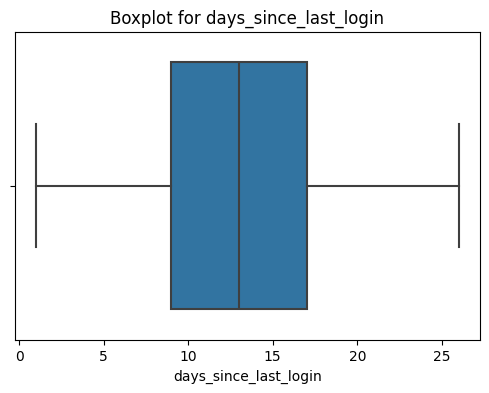

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['days_since_last_login'])
plt.title("Boxplot for days_since_last_login")
plt.show()

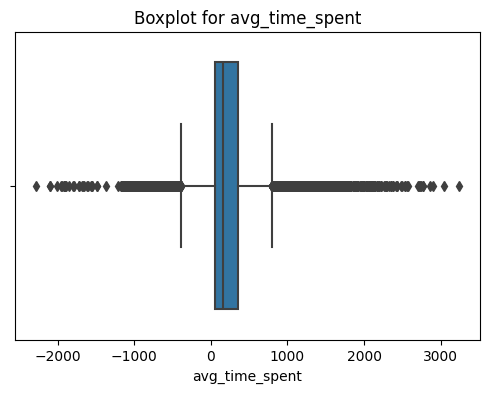

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['avg_time_spent'])
plt.title("Boxplot for avg_time_spent")
plt.show()

In [29]:
data = data[data['avg_time_spent'] >= 0]

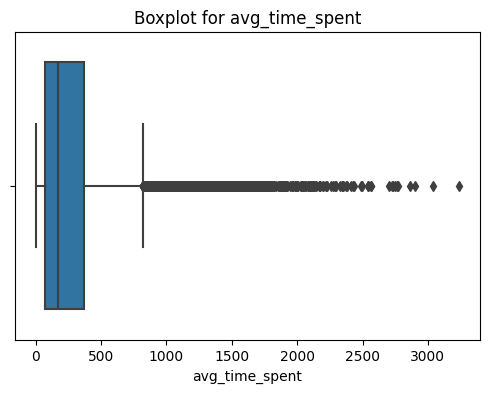

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['avg_time_spent'])
plt.title("Boxplot for avg_time_spent")
plt.show()

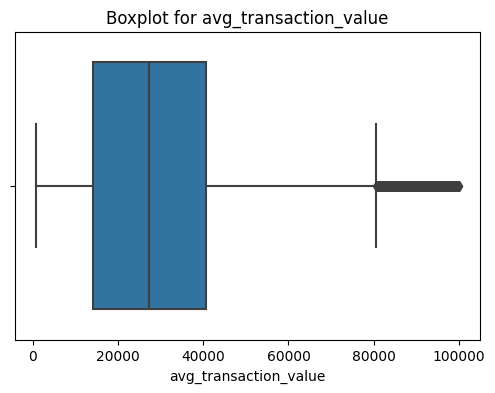

In [31]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['avg_transaction_value'])
plt.title("Boxplot for avg_transaction_value")
plt.show()

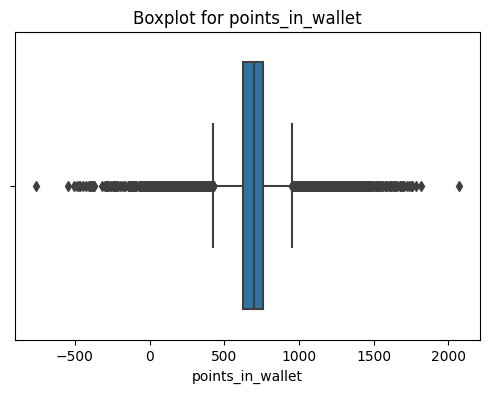

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['points_in_wallet'])
plt.title("Boxplot for points_in_wallet")
plt.show()

In [33]:
data['points_in_wallet'] = data['points_in_wallet'].apply(lambda x: max(x, 0))

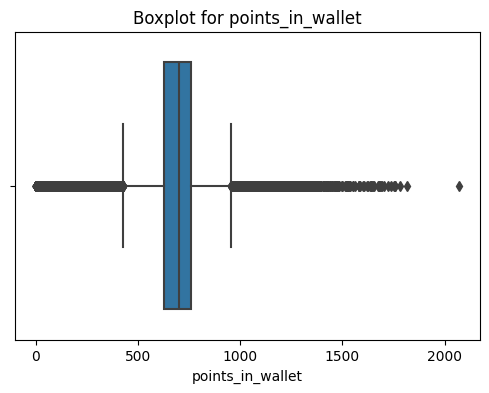

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['points_in_wallet'])
plt.title("Boxplot for points_in_wallet")
plt.show()

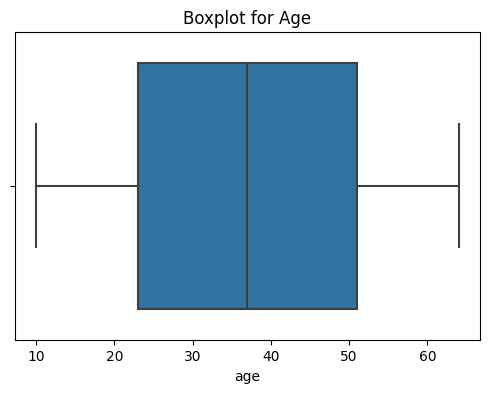

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['age'])
plt.title("Boxplot for Age")
plt.show()

In [36]:
data.shape

(29545, 22)

In [37]:
# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Apply capping to selected columns
columns_to_cap = ['avg_time_spent', 'avg_transaction_value', 'points_in_wallet'  , 'avg_frequency_login_days' ]
for col in columns_to_cap:
    cap_outliers(data, col)

# Verify outliers are handled
for col in columns_to_cap:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Remaining outliers in {col}:",
          data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0])

Remaining outliers in avg_time_spent: 0
Remaining outliers in avg_transaction_value: 0
Remaining outliers in points_in_wallet: 0
Remaining outliers in avg_frequency_login_days: 0


In [38]:
data.shape

(29545, 22)

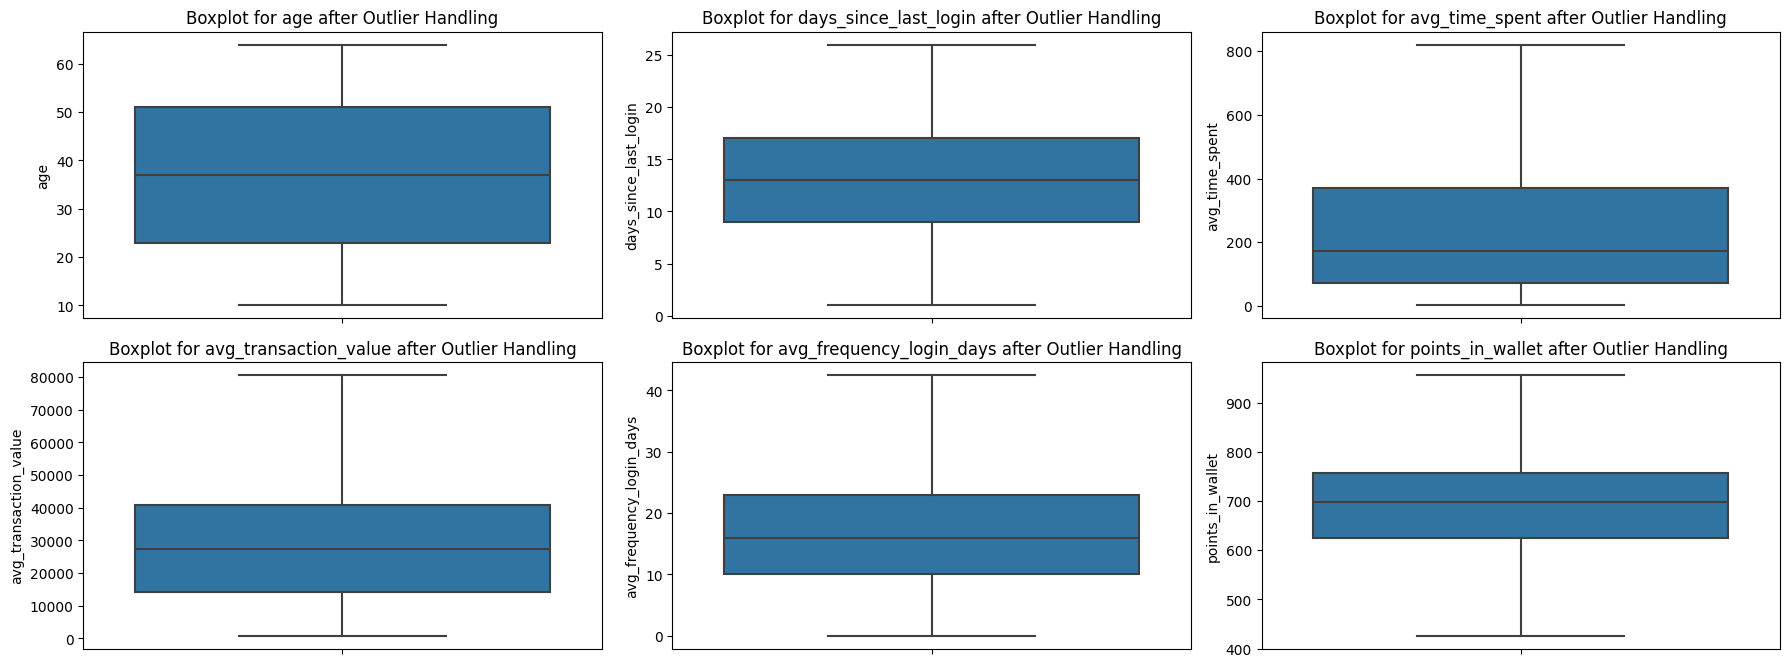

In [39]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'churn_risk_score']
plt.figure(figsize=(18, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot for {col} after Outlier Handling")

plt.tight_layout()
plt.show()

In [40]:
# 1. days_since_last_login - Highly negatively skewed
data['days_since_last_login'] = np.sqrt(data['days_since_last_login'])  # Square root transformation

# 2. avg_time_spent - Moderately positively skewed
data['avg_time_spent'] = np.log1p(data['avg_time_spent'])  # Log transformation

# 3. avg_transaction_value - Positively skewed
data['avg_transaction_value'], _ = boxcox(data['avg_transaction_value'] + 1)  # Box-Cox transformation

# Check the new skewness values
print(data[['days_since_last_login', 'avg_time_spent', 'avg_transaction_value']].skew())

days_since_last_login   -0.565930
avg_time_spent          -0.084693
avg_transaction_value   -0.093981
dtype: float64


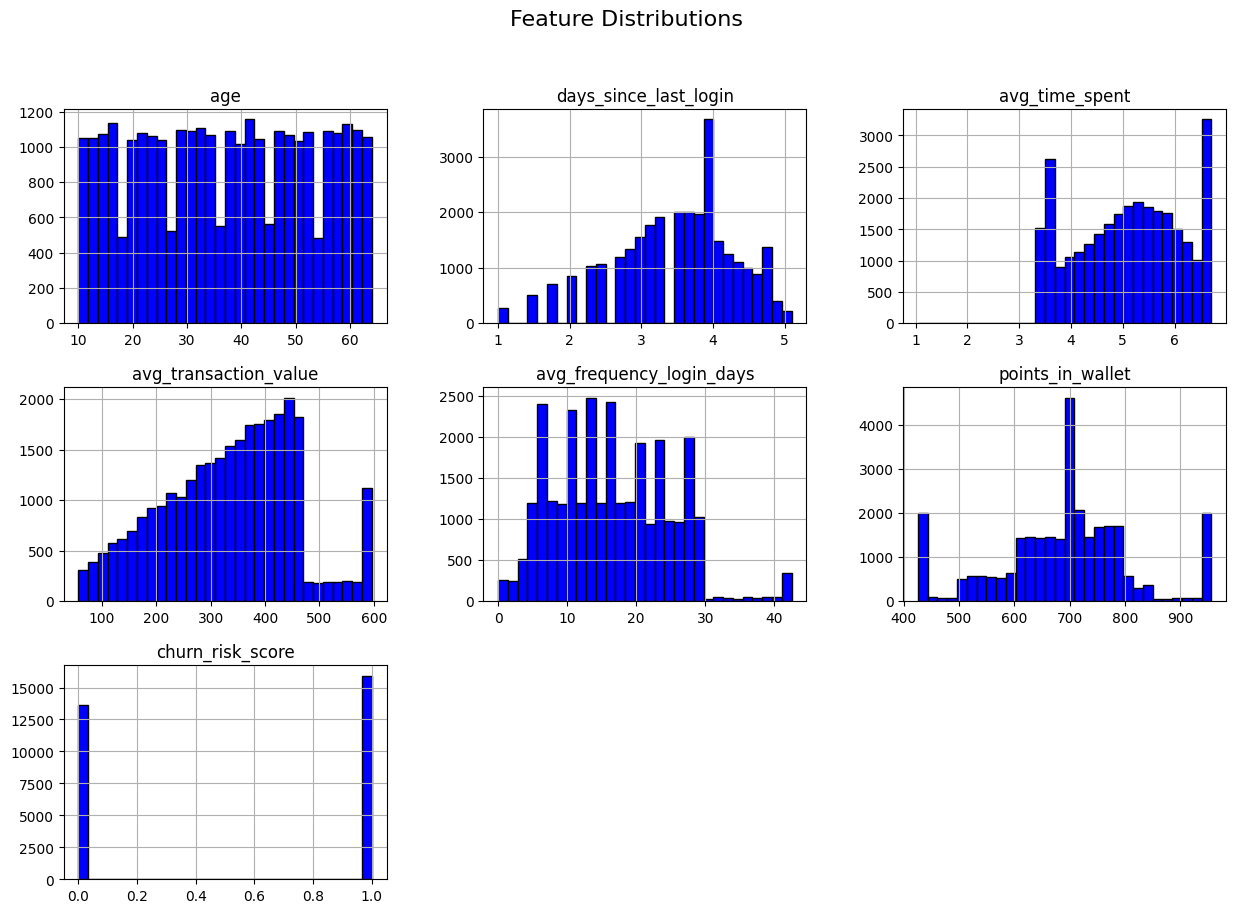

In [41]:
# Plot distributions of numerical features
data.hist(figsize=(15, 10), bins=30, color='blue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Document key patterns and relationships in the data

In [42]:
print(data["churn_risk_score"].value_counts(normalize=True) * 100)  # Percentage of churned customers

churn_risk_score
1    53.938061
0    46.061939
Name: proportion, dtype: float64


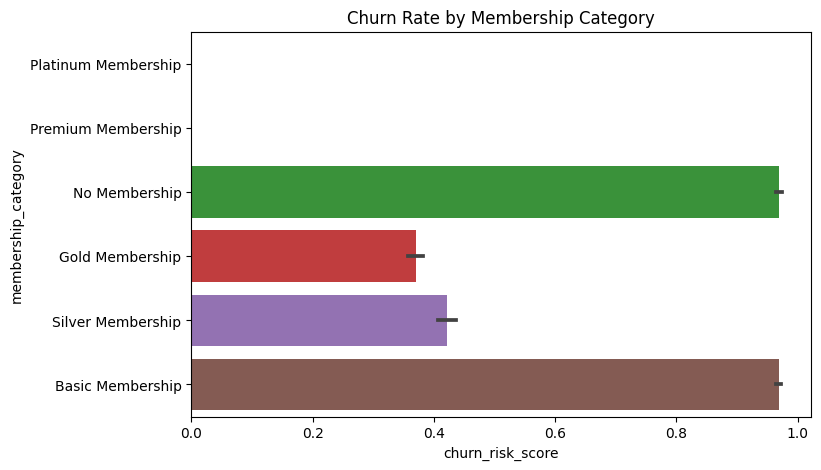

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(y="membership_category", x="churn_risk_score", data=data)
plt.title("Churn Rate by Membership Category")
plt.show()

In [44]:
data["referral_id"] = data["referral_id"].replace("xxxxxxxx", "No_ID")

In [45]:
for i in data:
    print(i , data[i].unique())

age [18 32 44 37 31 13 21 42 45 25 60 11 34 40 57 39 33 30 19 48 43 29 10 20
 17 12 52 26 24 58 41 50 38 35 28 53 47 49 54 62 55 51 16 56 23 59 27 46
 61 15 64 22 14 36 63]
gender ['F' 'M']
region_category ['Village' 'City' 'Town']
membership_category ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joining_date ['17-08-2017' '28-08-2017' '11-11-2016' ... '23-12-2017' '25-09-2016'
 '15-04-2017']
joined_through_referral ['No' 'Yes']
referral_id ['No_ID' 'CID21329' 'CID12313' ... 'CID10431' 'CID50925' 'CID45477']
preferred_offer_types ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers']
medium_of_operation ['?' 'Desktop' 'Smartphone' 'Both']
internet_option ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time ['16:08:02' '12:38:13' '22:53:21' ... '15:41:36' '5:29:19' '9:50:03']
days_since_last_login [4.12310563 4.         3.74165739 3.31662479 4.47213595 4.79583152
 3.16227766 4.35889894 3.87298335 3.

In [46]:
data = data[data["medium_of_operation"] != "?"]

Transform features

In [47]:
# Convert avg_frequency_login_days to numeric
data['avg_frequency_login_days'] = pd.to_numeric(data['avg_frequency_login_days'], errors='coerce')

# Label Encoding for binary categorical variables
binary_cols = ['gender', 'joined_through_referral', 'used_special_discount', 'offer_application_preference', 'past_complaint']
for col in binary_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# One-Hot Encoding for categorical variables
categorical_cols = ['region_category', 'membership_category', 'medium_of_operation', 'internet_option', 'complaint_status', 'feedback', 'preferred_offer_types']
data = pd.get_dummies(data, columns=[col for col in categorical_cols if col in data.columns], drop_first=True)

# change objects
data['joining_date'] = pd.to_datetime(data['joining_date'], errors='coerce')
data['last_visit_time'] = pd.to_datetime(data['last_visit_time'], errors='coerce')

data['joining_year'] = data['joining_date'].dt.year
data['joining_month'] = data['joining_date'].dt.month
data['days_since_joining'] = (pd.Timestamp.now() - data['joining_date']).dt.days

data['last_visit_hour'] = data['last_visit_time'].dt.hour
data['days_since_last_visit'] = (pd.Timestamp.now() - data['last_visit_time']).dt.days

data = data.drop(columns=['joining_date', 'referral_id', 'last_visit_time'])

# Display final dataset info
print(data.info())

# Save preprocessed data
data.to_csv('./data/preprocessed_churn.csv', index=False)

print("Preprocessing complete. File saved as preprocessed_churn.csv")

C:\Users\zoma_\AppData\Local\Temp\ipykernel_23224\1005832502.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['joining_date'] = pd.to_datetime(data['joining_date'], errors='coerce')
C:\Users\zoma_\AppData\Local\Temp\ipykernel_23224\1005832502.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['last_visit_time'] = pd.to_datetime(data['last_visit_time'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 25259 entries, 1 to 36990
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          25259 non-null  int64  
 1   gender                                       25259 non-null  int32  
 2   joined_through_referral                      25259 non-null  int32  
 3   days_since_last_login                        25259 non-null  float64
 4   avg_time_spent                               25259 non-null  float64
 5   avg_transaction_value                        25259 non-null  float64
 6   avg_frequency_login_days                     25259 non-null  float64
 7   points_in_wallet                             25259 non-null  float64
 8   used_special_discount                        25259 non-null  int32  
 9   offer_application_preference                 25259 non-null  int32  
 10  pas

# New MileStone

Advanced Statistical Data Analysis

## <p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Churn Prediction and Analysis</p>

<img src="https://i.pinimg.com/736x/72/32/fd/7232fd15fc334f31b55e6320b0741d6e.jpg" alt="Statistical analysis and visualizations">

This analysis investigates customer churn behavior using feature transformations, statistical tests, and dimensionality reduction techniques.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   

    Feature Transformation Summary:
-	Label Encoding: Applied to ordinal categorical variables to convert them into numerical values whilepreserving order.
-	One-Hot Encoding: Used for nominal categorical variables to create binary columns, ensuring the modeldoesn't assume any ordinal relationship.
-	Sin-Cos Transformation
Dimensionality Reduction:
-	Helped in visualizing clusters and identifying key feature patterns in churn behavior.
Statistical Testing:
-	T-Test: Compared means of a continuous variable across two groups
-	Chi-Square Test: Assessed independence between categorical features and churn outcome.
-	ANOVA (F-One Way Test): Evaluated mean differences across more than two groups .

In [48]:
# Handle cyclical features using sine and cosine transformations
data['joining_month_sin'] = np.sin(2 * np.pi * data['joining_month'] / 12)
data['joining_month_cos'] = np.cos(2 * np.pi * data['joining_month'] / 12)
data.drop('joining_month', axis=1, inplace=True)

data['last_visit_hour_sin'] = np.sin(2 * np.pi * data['last_visit_hour'] / 24)
data['last_visit_hour_cos'] = np.cos(2 * np.pi * data['last_visit_hour'] / 24)
data.drop('last_visit_hour', axis=1, inplace=True)

Adding new features

In [49]:
data['avg_frequency_login_days'] = pd.to_numeric(data['avg_frequency_login_days'], errors='coerce')
data['interaction_frequency'] = 1 / data['avg_frequency_login_days']
data['recency_of_last_activity'] = data['days_since_last_login']

In [50]:
# Standardize numerical columns
numerical_cols = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet','interaction_frequency','recency_of_last_activity', 'joining_year', 'days_since_joining']
scaler = MinMaxScaler()  # Create MinMaxScaler instance
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
with open('./model/scaler.pkl', 'wb') as scaler_file:
    dump(scaler, scaler_file)

In [51]:
# create 'engagment_score' feature to capture interaction between time spent and transaction.
data['engagment_score'] = data['avg_time_spent'] * data['avg_transaction_value']
data[['avg_time_spent', 'avg_transaction_value', 'engagment_score']].head()

avg_time_spent  avg_transaction_value  engagment_score
1        0.826522               0.329968         0.272726
2        0.918329               0.453952         0.416878
3        0.520619               0.508273         0.264617
4        0.651761               0.498876         0.325148
6        0.527349               0.257669         0.135882

In [52]:
data.columns

Index(['age', 'gender', 'joined_through_referral', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'churn_risk_score',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'complaint_status_Not Applicable',
       'complaint_status_Solved', 'complaint_status_Solved in Follow-up',
       'complaint_status_Unsolved', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock',

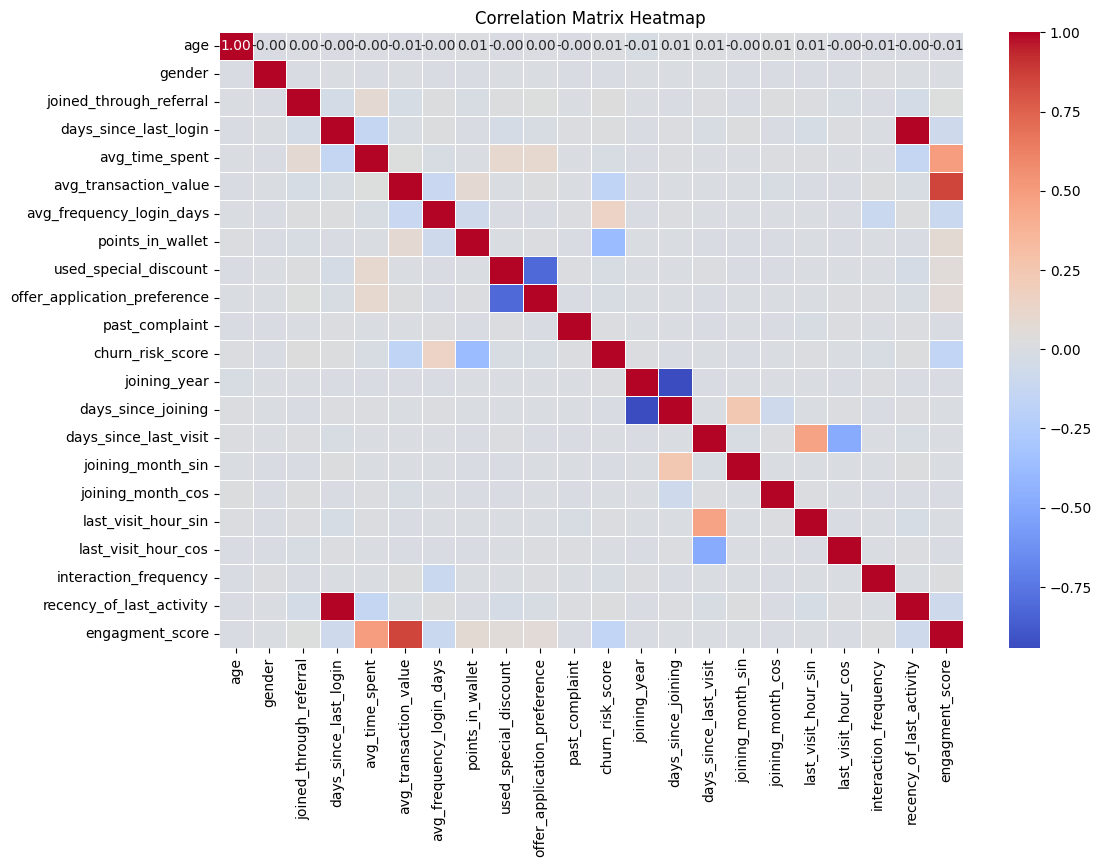

In [53]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [54]:
categorical_columns = data.select_dtypes(include=[ 'category'])
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded.head()

Empty DataFrame
Columns: []
Index: [1, 2, 3, 4, 6]

In [55]:
data_encoded.columns

RangeIndex(start=0, stop=0, step=1)

In [56]:
data.columns

Index(['age', 'gender', 'joined_through_referral', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'churn_risk_score',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'complaint_status_Not Applicable',
       'complaint_status_Solved', 'complaint_status_Solved in Follow-up',
       'complaint_status_Unsolved', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock',

In [57]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'churn_risk_score', 'joining_year', 'days_since_joining',
       'days_since_last_visit', 'joining_month_sin', 'joining_month_cos',
       'last_visit_hour_sin', 'last_visit_hour_cos', 'interaction_frequency',
       'recency_of_last_activity', 'engagment_score'],
      dtype='object')

In [58]:
data.dtypes

age                                            float64
gender                                           int32
joined_through_referral                          int32
days_since_last_login                          float64
avg_time_spent                                 float64
avg_transaction_value                          float64
avg_frequency_login_days                       float64
points_in_wallet                               float64
used_special_discount                            int32
offer_application_preference                     int32
past_complaint                                   int32
churn_risk_score                                 int64
region_category_Town                              bool
region_category_Village                           bool
membership_category_Gold Membership               bool
membership_category_No Membership                 bool
membership_category_Platinum Membership           bool
membership_category_Premium Membership            bool
membership

In [59]:
data['churn_risk_score'] ## it's binary now:>

1        0
2        1
3        1
4        1
6        0
        ..
36983    1
36984    0
36985    0
36986    0
36990    0
Name: churn_risk_score, Length: 25259, dtype: int64

In [60]:
data = data.astype({col: 'int32' for col in data.select_dtypes(include=['bool']).columns})

In [61]:
data.dtypes

age                                            float64
gender                                           int32
joined_through_referral                          int32
days_since_last_login                          float64
avg_time_spent                                 float64
avg_transaction_value                          float64
avg_frequency_login_days                       float64
points_in_wallet                               float64
used_special_discount                            int32
offer_application_preference                     int32
past_complaint                                   int32
churn_risk_score                                 int64
region_category_Town                             int32
region_category_Village                          int32
membership_category_Gold Membership              int32
membership_category_No Membership                int32
membership_category_Platinum Membership          int32
membership_category_Premium Membership           int32
membership

In [62]:
def is_minmax_scaled(data):
    return np.all(data >= 0) and np.all(data <= 1)

In [63]:
def has_negative(data):
    return np.any(data < 0)

In [64]:
if has_negative(numeric_data):
    print("Data contains negative values.")
else:
    print("Data does not contain negative values.")

Data contains negative values.


To check if the new col are added

In [65]:
data.columns

Index(['age', 'gender', 'joined_through_referral', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'churn_risk_score',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'complaint_status_Not Applicable',
       'complaint_status_Solved', 'complaint_status_Solved in Follow-up',
       'complaint_status_Unsolved', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock',

In [66]:
numeric_data

age  gender  joined_through_referral  days_since_last_login  \
1      0.407407       0                        1               0.731882   
2      0.629630       0                        1               0.668857   
3      0.500000       1                        1               0.565166   
4      0.388889       0                        0               0.847065   
6      0.203704       1                        1               0.527511   
...         ...     ...                      ...                    ...   
36983  0.648148       1                        1               0.487922   
36984  0.759259       1                        0               0.951198   
36985  0.037037       0                        0               0.635652   
36986  0.314815       1                        1               0.635652   
36990  0.796296       1                        0               0.700895   

       avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
1            0.826522               0.329968                  0.235128   
2            0.918329               0.453952                  0.517543   
3            0.520619               0.508273                  0.140990   
4            0.651761               0.498876                  0.376335   
6            0.527349               0.257669                  0.658750   
...               ...                    ...                       ...   
36983        0.507323               0.720763                  0.258663   
36984        0.829928               0.873969                  0.046852   
36985        0.881357               0.817216                  0.164525   
36986        0.683764               0.241769                  0.376335   
36990        0.906496               0.078982                  0.470474   

       points_in_wallet  used_special_discount  offer_application_preference  \
1              0.512690                      1                             0   
2              0.141096                      0                             1   
3              0.267464                      0                             1   
4              0.447477                      0                             1   
6              0.623245                      1                             0   
...                 ...                    ...                           ...   
36983          0.000000                      1                             0   
36984          0.665682                      0                             1   
36985          0.566033                      1                             1   
36986          0.608829                      1                             0   
36990          0.000000                      1                             1   

       ...  joining_year  days_since_joining  days_since_last_visit  \
1      ...           1.0            0.114155                      0   
2      ...           0.5            0.378995                     -1   
3      ...           0.5            0.390868                      0   
4      ...           1.0            0.100457                      0   
6      ...           0.0            0.929680                      0   
...    ...           ...                 ...                    ...   
36983  ...           0.5            0.445662                      0   
36984  ...           0.5            0.410959                      0   
36985  ...           0.5            0.394521                      0   
36986  ...           0.0            0.772603                      0   
36990  ...           1.0            0.181735                      0   

       joining_month_sin  joining_month_cos  last_visit_hour_sin  \
1          -8.660254e-01      -5.000000e-01         1.224647e-16   
2          -5.000000e-01       8.660254e-01        -5.000000e-01   
3          -8.660254e-01       5.000000e-01        -7.071068e-01   
4          -1.000000e+00      -1.836970e-16        -7.071068e-01   
6           1.000000e+00       6.123234e-17         2.588190e-01   


In [67]:
numerical_features

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'churn_risk_score', 'joining_year', 'days_since_joining',
       'days_since_last_visit', 'joining_month_sin', 'joining_month_cos',
       'last_visit_hour_sin', 'last_visit_hour_cos', 'interaction_frequency',
       'recency_of_last_activity', 'engagment_score'],
      dtype='object')

In [68]:
if numeric_data.skew().abs().max() > 1 :
        print(" Data is highly skewed.")
else:
        print(" Data is not highly skewed.")

 Data is highly skewed.


<a id="4"></a>
## <p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Dimensionality Reduction</p>

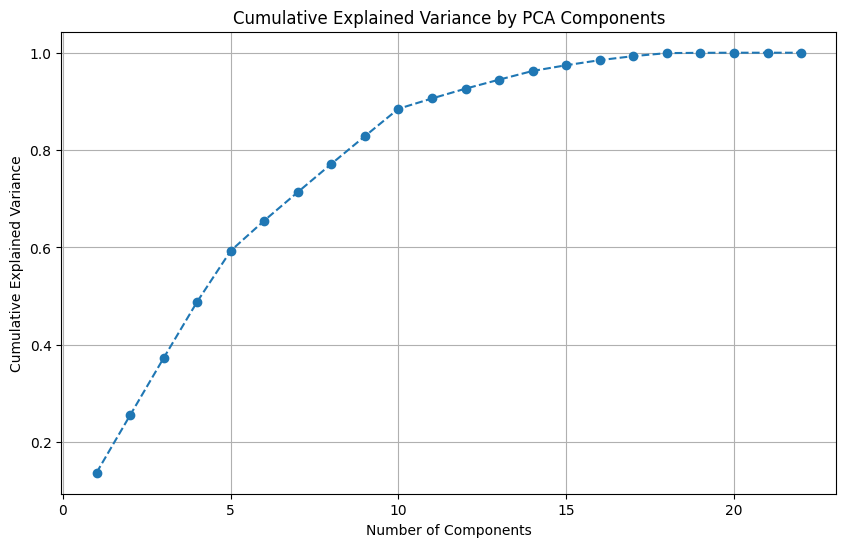

In [69]:
pca = PCA()
pca.fit(numeric_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [70]:
pca = PCA(n_components=10)  # Choosing 10 components initially
principal_components = pca.fit_transform(numeric_data)
explained_variance = pca.explained_variance_ratio_
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(10)])
explained_variance

array([0.13711676, 0.11791936, 0.11755532, 0.11579449, 0.10461647,
       0.06209596, 0.05850094, 0.05800735, 0.05693141, 0.05631511])

Here are some statistical data analysis
to see the significant difference between the data and the target value

In [71]:
for col in numerical_features:
    churned = data[data['churn_risk_score'] == 1][col]
    not_churned = data[data['churn_risk_score'] == 0][col]
    t_stat, p_value = ttest_ind(churned, not_churned, equal_var=False)
    print(f"{col}: T-Statistic = {t_stat}, P-Value = {p_value}")

age: T-Statistic = 1.0291063483803022, P-Value = 0.3034398097926123
days_since_last_login: T-Statistic = 3.256613947065209, P-Value = 0.0011290282625229906
avg_time_spent: T-Statistic = -2.5739625251161558, P-Value = 0.010059899531520153
avg_transaction_value: T-Statistic = -26.35351503442916, P-Value = 9.88928662206238e-151
avg_frequency_login_days: T-Statistic = 24.13366453350477, P-Value = 3.425656976641295e-127
points_in_wallet: T-Statistic = -65.09160505344887, P-Value = 0.0
churn_risk_score: T-Statistic = inf, P-Value = 0.0
joining_year: T-Statistic = 1.142349343068872, P-Value = 0.2533199092063165
days_since_joining: T-Statistic = -1.5125555325669842, P-Value = 0.13040539380574573
days_since_last_visit: T-Statistic = 0.6160412383248733, P-Value = 0.5378729984007589
joining_month_sin: T-Statistic = -1.4059920277216071, P-Value = 0.15973907192132453
joining_month_cos: T-Statistic = 0.09691253735107301, P-Value = 0.9227966410249064
last_visit_hour_sin: T-Statistic = 1.0240888234714

c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [72]:
for col in numerical_features:
    groups = [group[col].values for _, group in data.groupby('churn_risk_score')]
    f_stat, p_value = f_oneway(*groups)
    print(f"{col}: F-Statistic = {f_stat}, P-Value = {p_value}")

age: F-Statistic = 1.0598026445068178, P-Value = 0.303270059698324
days_since_last_login: F-Statistic = 10.637060928141079, P-Value = 0.001109906209613668
avg_time_spent: F-Statistic = 6.625932517797702, P-Value = 0.010056095979445796
avg_transaction_value: F-Statistic = 719.1705290384273, P-Value = 3.127065502388826e-156
avg_frequency_login_days: F-Statistic = 585.191942138169, P-Value = 7.933440884083437e-128
points_in_wallet: F-Statistic = 4193.366875562987, P-Value = 0.0
churn_risk_score: F-Statistic = inf, P-Value = 0.0
joining_year: F-Statistic = 1.3037674426973194, P-Value = 0.2535370267987655
days_since_joining: F-Statistic = 2.2863152262594393, P-Value = 0.1305319702868566
days_since_last_visit: F-Statistic = 0.3798422489150272, P-Value = 0.5376932286432315
joining_month_sin: F-Statistic = 1.9752983053269086, P-Value = 0.15989889815680197
joining_month_cos: F-Statistic = 0.009399440058510618, P-Value = 0.9227663073965657
last_visit_hour_sin: F-Statistic = 1.047935879536663, P-

c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [73]:
for col in numeric_data:
    contingency_table = pd.crosstab(data[col], data['churn_risk_score'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{col}: Chi-Square = {chi2}, P-Value = {p_value}")

age: Chi-Square = 47.44602957039336, P-Value = 0.7234986566631724
gender: Chi-Square = 0.5198229334737573, P-Value = 0.4709172232980041
joined_through_referral: Chi-Square = 26.721255690369095, P-Value = 2.3502191832971283e-07
days_since_last_login: Chi-Square = 32.18848195761355, P-Value = 0.15263057122213244
avg_time_spent: Chi-Square = 16599.594774081725, P-Value = 0.3416833191994665
avg_transaction_value: Chi-Square = 25218.758936941325, P-Value = 0.00026396606600733526
avg_frequency_login_days: Chi-Square = 1825.2357351520723, P-Value = 8.825952201117967e-151
points_in_wallet: Chi-Square = 18522.162647842633, P-Value = 1.6250173779247066e-103
used_special_discount: Chi-Square = 2.6035066001199443, P-Value = 0.10662755853647554
offer_application_preference: Chi-Square = 7.432103252897479, P-Value = 0.0064070413825135855
past_complaint: Chi-Square = 1.0701246625159708, P-Value = 0.3009172891946464
churn_risk_score: Chi-Square = 25254.976053968014, P-Value = 0.0
joining_year: Chi-Squ

In [74]:
churned = data[data['churn_risk_score'] == 1]
not_churned = data[data['churn_risk_score'] == 0]

all_features = [col for col in data.columns if data[col].dtype != 'O' and col != 'churn_risk_score']
ttest_results_all = []
for col in all_features:
    stat, p_value = ttest_ind(churned[col], not_churned[col], equal_var=False, nan_policy='omit')
    ttest_results_all.append({
        'Feature': col,
        'T-Statistic': round(stat, 3),
        'P-Value': round(p_value, 4),
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

ttest_df_all = pd.DataFrame(ttest_results_all).sort_values('P-Value').reset_index(drop=True)
ttest_df_all.style.background_gradient(subset=['P-Value'], cmap='Blues') \
    .applymap(lambda x: 'color: green' if x == 'Yes' else 'color: red', subset=['Significant'])

C:\Users\zoma_\AppData\Local\Temp\ipykernel_23224\3689007595.py:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda x: 'color: green' if x == 'Yes' else 'color: red', subset=['Significant'])


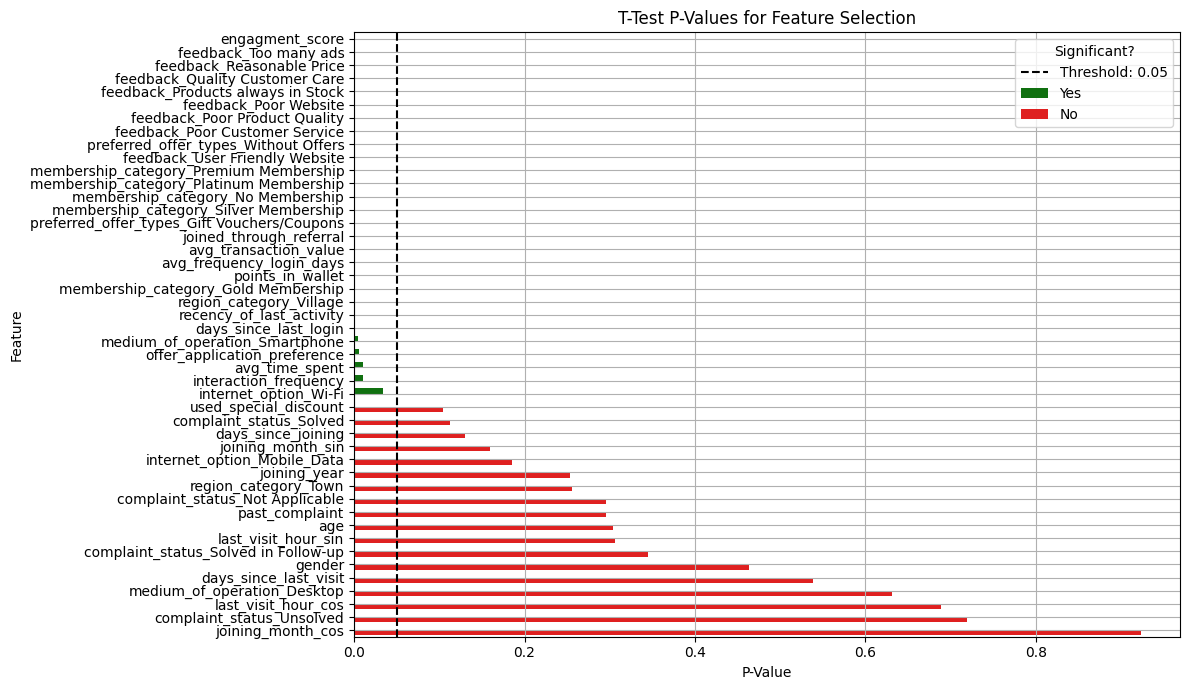

In [75]:
plt.figure(figsize=(12, 7))
sns.barplot(data=ttest_df_all, y='Feature', x='P-Value', hue='Significant', palette={'Yes': 'green', 'No': 'red'})
plt.axvline(0.05, color='black', linestyle='--', label='Threshold: 0.05')
plt.title('T-Test P-Values for Feature Selection')
plt.xlabel('P-Value')
plt.ylabel('Feature')
plt.legend(title='Significant?')
plt.grid(True)
plt.tight_layout()
plt.show()

<p>Data visualizations
Enhanced Visualizations
Churn Trends & Feature Importance:</p>   
    
* [1. CountPlot: Shows distribution of churn across categorical features like customer score counts](*1)

* [2.BarPlot: Used to show average churn rate by features including numeric and categorical](*2)

* [3.violin Plot: Displays churn probability density over numerical features avg_transaction_value, avg_time spent](*3)

*	[4.PairPlot: Illustrates pairwise relationships between key numerical features,: , avg_time spent,points in wallet, transaction.](*4)

    

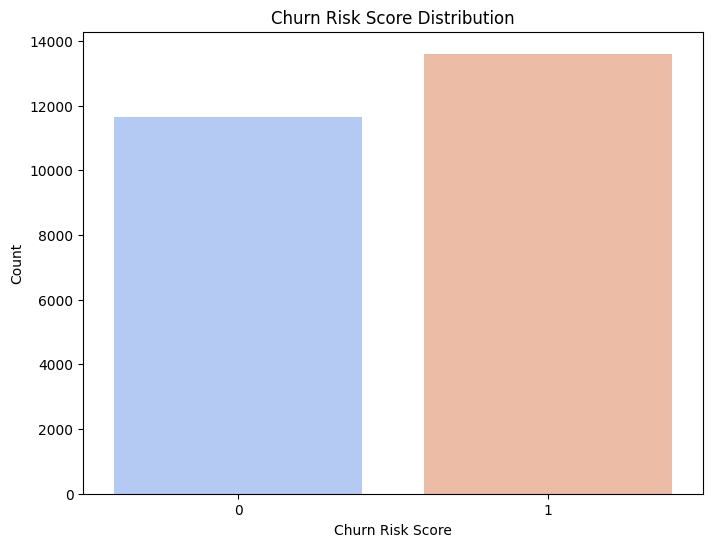

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(x='churn_risk_score', data=data, palette='coolwarm')
plt.title('Churn Risk Score Distribution')
plt.xlabel('Churn Risk Score')
plt.ylabel('Count')
plt.show()

c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


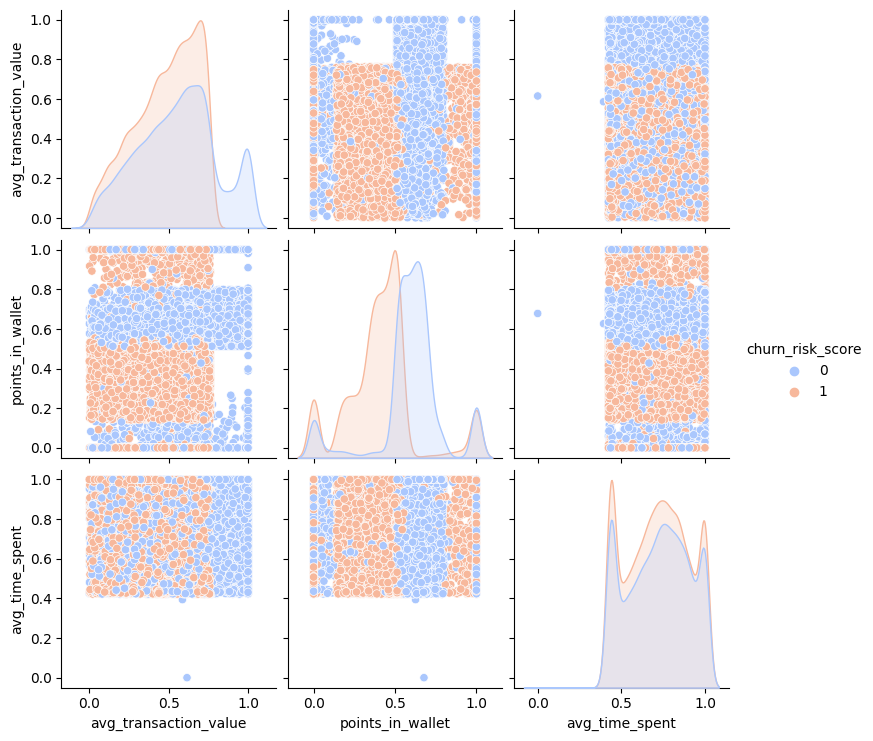

In [77]:
sns.pairplot(data, vars=['avg_transaction_value', 'points_in_wallet', 'avg_time_spent'], hue='churn_risk_score', palette='coolwarm')
plt.show()

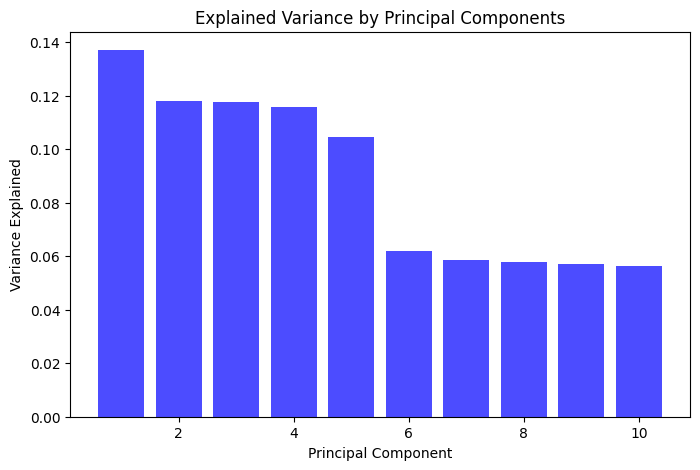

In [78]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

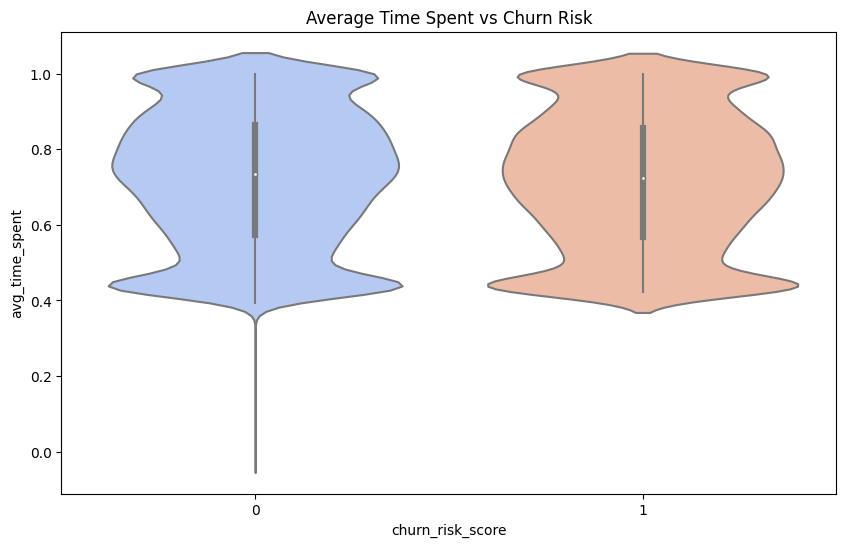

In [79]:
plt.figure(figsize=(10,6))
sns.violinplot(x='churn_risk_score', y='avg_time_spent', data=data, palette='coolwarm')
plt.title("Average Time Spent vs Churn Risk")
plt.show()

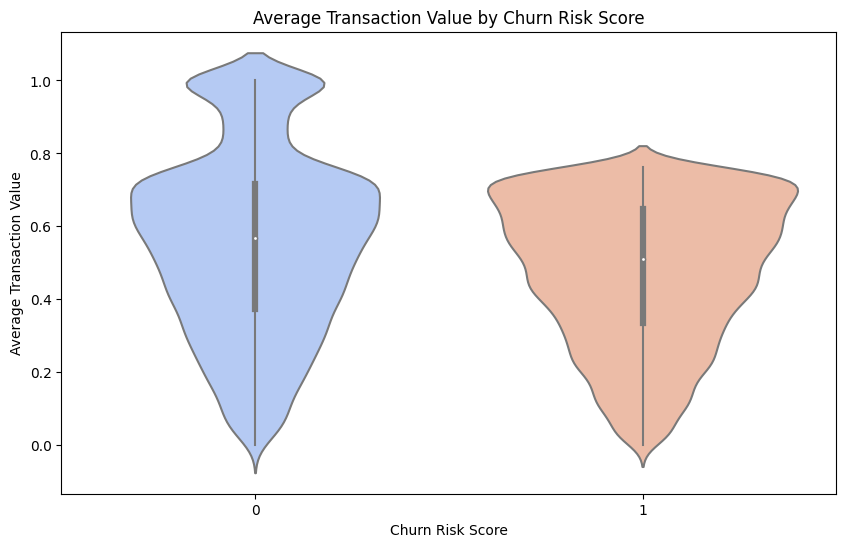

In [80]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='churn_risk_score', y='avg_transaction_value', data=data, palette='coolwarm')
plt.title('Average Transaction Value by Churn Risk Score')
plt.xlabel('Churn Risk Score')
plt.ylabel('Average Transaction Value')
plt.show()

In [81]:
fig = px.histogram(data, x='churn_risk_score', color='membership_category_Gold Membership', barmode='group')
fig.update_layout(title="Churn Distribution by Membership Type")
fig.show()

In [82]:
fig = px.histogram(data, x='churn_risk_score', color='past_complaint', barmode='group')
fig.update_layout(title="Churn Distribution by Complaint Status")
fig.show()

In [83]:
fig = px.box(data, x='churn_risk_score', y='interaction_frequency', color='churn_risk_score')
fig.update_layout(title="Interaction Frequency by Churn Risk Score")
fig.show()

In [84]:
data

age  gender  joined_through_referral  days_since_last_login  \
1      0.407407       0                        1               0.731882   
2      0.629630       0                        1               0.668857   
3      0.500000       1                        1               0.565166   
4      0.388889       0                        0               0.847065   
6      0.203704       1                        1               0.527511   
...         ...     ...                      ...                    ...   
36983  0.648148       1                        1               0.487922   
36984  0.759259       1                        0               0.951198   
36985  0.037037       0                        0               0.635652   
36986  0.314815       1                        1               0.635652   
36990  0.796296       1                        0               0.700895   

       avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
1            0.826522               0.329968                  0.235128   
2            0.918329               0.453952                  0.517543   
3            0.520619               0.508273                  0.140990   
4            0.651761               0.498876                  0.376335   
6            0.527349               0.257669                  0.658750   
...               ...                    ...                       ...   
36983        0.507323               0.720763                  0.258663   
36984        0.829928               0.873969                  0.046852   
36985        0.881357               0.817216                  0.164525   
36986        0.683764               0.241769                  0.376335   
36990        0.906496               0.078982                  0.470474   

       points_in_wallet  used_special_discount  offer_application_preference  \
1              0.512690                      1                             0   
2              0.141096                      0                             1   
3              0.267464                      0                             1   
4              0.447477                      0                             1   
6              0.623245                      1                             0   
...                 ...                    ...                           ...   
36983          0.000000                      1                             0   
36984          0.665682                      0                             1   
36985          0.566033                      1                             1   
36986          0.608829                      1                             0   
36990          0.000000                      1                             1   

       ...  joining_year  days_since_joining  days_since_last_visit  \
1      ...           1.0            0.114155                      0   
2      ...           0.5            0.378995                     -1   
3      ...           0.5            0.390868                      0   
4      ...           1.0            0.100457                      0   
6      ...           0.0            0.929680                      0   
...    ...           ...                 ...                    ...   
36983  ...           0.5            0.445662                      0   
36984  ...           0.5            0.410959                      0   
36985  ...           0.5            0.394521                      0   
36986  ...           0.0            0.772603                      0   
36990  ...           1.0            0.181735                      0   

       joining_month_sin  joining_month_cos  last_visit_hour_sin  \
1          -8.660254e-01      -5.000000e-01         1.224647e-16   
2          -5.000000e-01       8.660254e-01        -5.000000e-01   
3          -8.660254e-01       5.000000e-01        -7.071068e-01   
4          -1.000000e+00      -1.836970e-16        -7.071068e-01   
6           1.000000e+00       6.123234e-17         2.588190e-01   


In [85]:
data.dtypes

age                                            float64
gender                                           int32
joined_through_referral                          int32
days_since_last_login                          float64
avg_time_spent                                 float64
avg_transaction_value                          float64
avg_frequency_login_days                       float64
points_in_wallet                               float64
used_special_discount                            int32
offer_application_preference                     int32
past_complaint                                   int32
churn_risk_score                                 int64
region_category_Town                             int32
region_category_Village                          int32
membership_category_Gold Membership              int32
membership_category_No Membership                int32
membership_category_Platinum Membership          int32
membership_category_Premium Membership           int32
membership

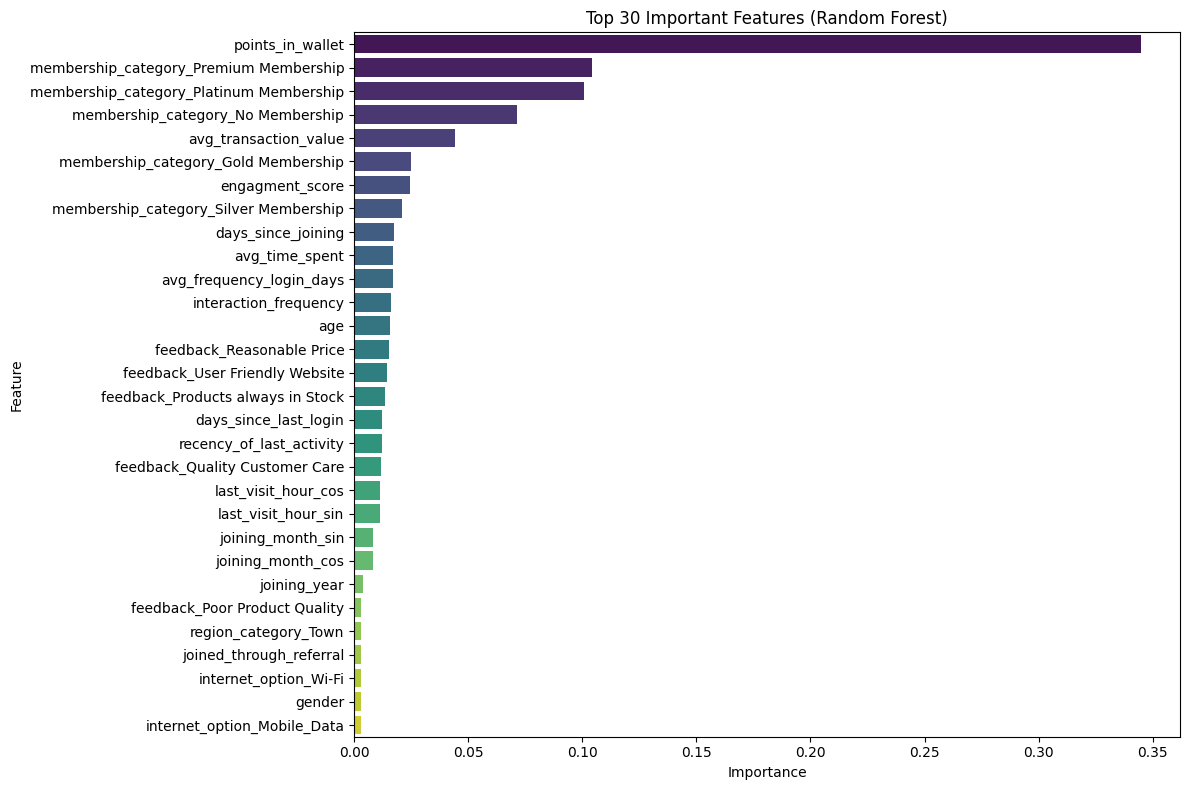

In [86]:
X = data.drop(columns=['churn_risk_score'])
y = data['churn_risk_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(30), palette='viridis')
plt.title('Top 30 Important Features (Random Forest)')
plt.tight_layout()
plt.show()


In [87]:
data = data.drop(columns=['joining_year', 'days_since_last_visit'], axis=1)
data.head()

age  gender  joined_through_referral  days_since_last_login  \
1  0.407407       0                        1               0.731882   
2  0.629630       0                        1               0.668857   
3  0.500000       1                        1               0.565166   
4  0.388889       0                        0               0.847065   
6  0.203704       1                        1               0.527511   

   avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
1        0.826522               0.329968                  0.235128   
2        0.918329               0.453952                  0.517543   
3        0.520619               0.508273                  0.140990   
4        0.651761               0.498876                  0.376335   
6        0.527349               0.257669                  0.658750   

   points_in_wallet  used_special_discount  offer_application_preference  ...  \
1          0.512690                      1                             0  ...   
2          0.141096                      0                             1  ...   
3          0.267464                      0                             1  ...   
4          0.447477                      0                             1  ...   
6          0.623245                      1                             0  ...   

   preferred_offer_types_Gift Vouchers/Coupons  \
1                                            1   
2                                            1   
3                                            1   
4                                            0   
6                                            1   

   preferred_offer_types_Without Offers  days_since_joining  \
1                                     0            0.114155   
2                                     0            0.378995   
3                                     0            0.390868   
4                                     0            0.100457   
6                                     0            0.929680   

   joining_month_sin  joining_month_cos  last_visit_hour_sin  \
1          -0.866025      -5.000000e-01         1.224647e-16   
2          -0.500000       8.660254e-01        -5.000000e-01   
3          -0.866025       5.000000e-01        -7.071068e-01   
4          -1.000000      -1.836970e-16        -7.071068e-01   
6           1.000000       6.123234e-17         2.588190e-01   

   last_visit_hour_cos  interaction_frequency  recency_of_last_activity  \
1            -1.000000               0.000704                  0.731882   
2             0.866025               0.000202                  0.668857   
3            -0.707107               0.001318                  0.565166   
4            -0.707107               0.000359                  0.847065   
6            -0.965926               0.000112                  0.527511   

   engagment_score  
1         0.272726  
2         0.416878  
3         0.264617  
4         0.325148  
6         0.135882  

[5 rows x 45 columns]

In [88]:
# Filter out important features that are not in the original data
important_features = [f for f in importance_df['Feature'].head(30) if f in data.columns]

<a id="4"></a>
## <p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Modeling</p>

# Random Forest using all the features

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters:
 {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy: 0.9239904988123515

Classification Report:
 {'0': {'precision': 0.927930535455861, 'recall': 0.9074440984998585, 'f1-score': 0.9175729822552947, 'support': 3533.0}, '1': {'precision': 0.9206888188212466, 'recall': 0.938442521631644, 'f1-score': 0.929480901077375, 'support': 4045.0}, 'accuracy': 0.9239904988123515, 'macro avg': {'precision': 0.9243096771385538, 'recall': 0.9229433100657513, 'f1-score': 0.9235269416663349, 'support': 7578.0}, 'weighted avg': {'precision': 0.9240650374633809, 'recall': 0.9239904988123515, 'f1-score': 0.923929214986268, 'support': 7578.0}}
ROC AUC Score: 0.9721907202337698


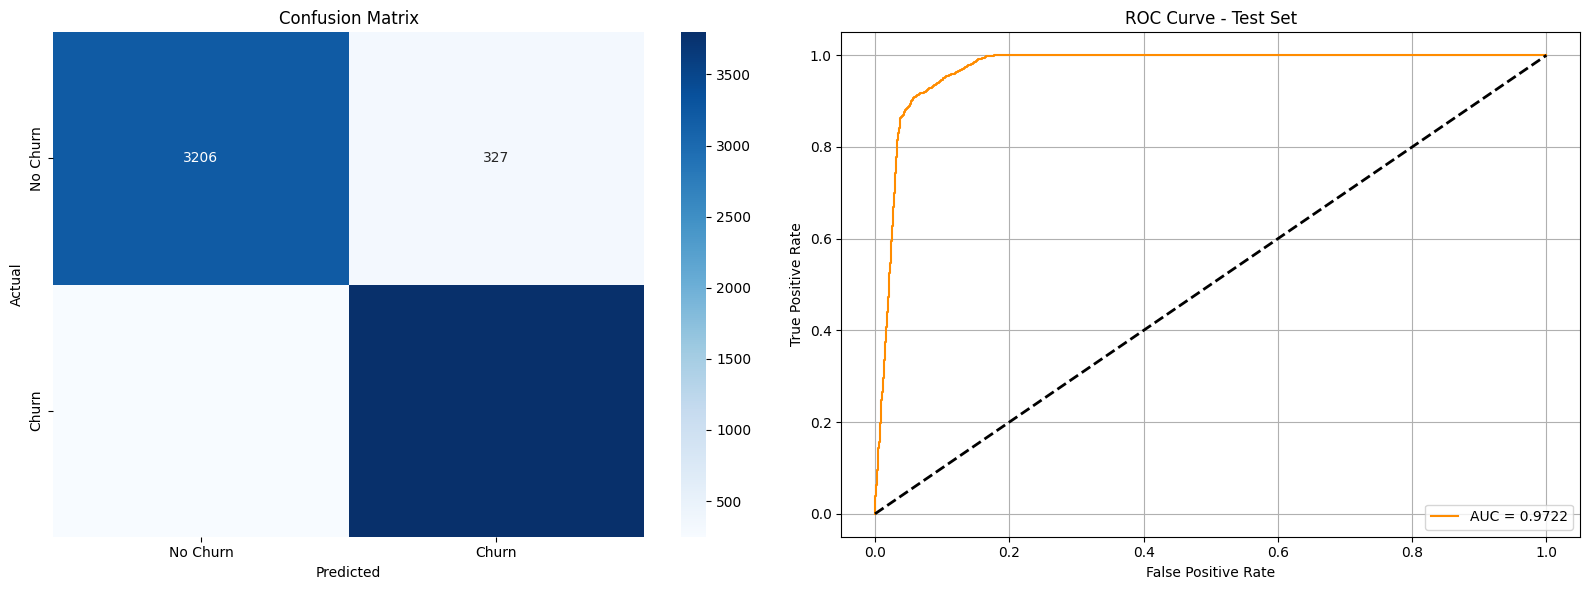

In [90]:
# Step 1: Split features and target
X = data.drop(columns=['churn_risk_score'])
y = data['churn_risk_score']

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define Grid Search parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Step 4: Initialize the model
rf = RandomForestClassifier(random_state=42)

# Step 5: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='roc_auc'
)

# Step 6: Fit the model
grid_search.fit(X_train, y_train)

# Step 7: Evaluate the best model
best_rf = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

rfa_acc = accuracy_score(y_test, y_pred)

# Accuracy
print("\nAccuracy:", rfa_acc)

# Classification Report
rfa_cr = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:\n", rfa_cr)

# ROC AUC Score
rfa_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", rfa_auc)

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'],
            ax = axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

fpr, tpr, _ = roc_curve(y_test, y_prob)

# ROC Curve
axes[1].plot(fpr, tpr, label=f"AUC = {rfa_auc:.4f}", color='darkorange')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Test Set")
axes[1].legend()
axes[1].grid(True)

# Display the two plots side by side
plt.tight_layout()
plt.show()

# Random Forest using Important Features

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': True}

Accuracy: 0.9278

Classification Report:
{'0': {'precision': 0.9310143232972815, 'recall': 0.9110411899313501, 'f1-score': 0.9209194737603007, 'support': 3496.0}, '1': {'precision': 0.9251864325234544, 'recall': 0.9421852033317002, 'f1-score': 0.9336084476271393, 'support': 4082.0}, 'accuracy': 0.9278173660596464, 'macro avg': {'precision': 0.928100377910368, 'recall': 0.9266131966315252, 'f1-score': 0.9272639606937201, 'support': 7578.0}, 'weighted avg': {'precision': 0.9278750451053097, 'recall': 0.9278173660596464, 'f1-score': 0.9277545742253885, 'support': 7578.0}}

AUC: 0.9733
y_test: 7578  | y_prob: 7578


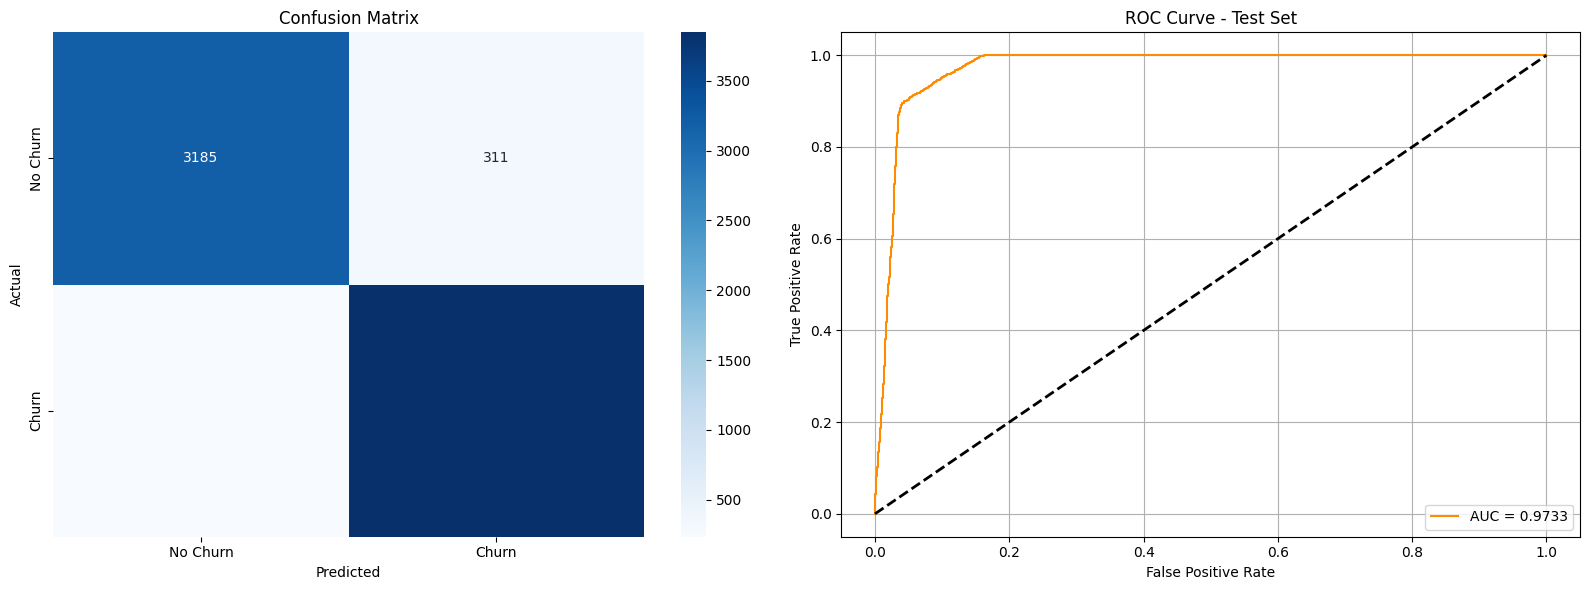

In [91]:
# Redefine input features and target
target_column = 'churn_risk_score'
X = data[important_features]
y = data[target_column]

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

# Initialize and run RandomizedSearchCV
rf_if = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_if,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

rfif_acc = accuracy_score(y_test, y_pred)
rfif_cr = classification_report(y_test, y_pred, output_dict=True)
rfif_auc = roc_auc_score(y_test, y_pred_prob)

print("Best Hyperparameters found:", random_search.best_params_)
print(f"\nAccuracy: {rfif_acc:.4f}")
print("\nClassification Report:")
print(rfif_cr)
print(f"\nAUC: {rfif_auc:.4f}")

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot confusion matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Predict on the same test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Confirm both are the same length
print("y_test:", len(y_test), " | y_prob:", len(y_prob))

# Then safely use ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
# Plot ROC Curve on the second subplot
axes[1].plot(fpr, tpr, label=f"AUC = {rfif_auc:.4f}", color='darkorange')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Test Set")
axes[1].legend()
axes[1].grid(True)

# Display the two plots side by side
plt.tight_layout()
plt.show()


# Random Forest using T-Test statistical Analysis

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
 {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced'}

Accuracy: 0.9254420691475324

Classification Report:
 {'0': {'precision': 0.9298957126303592, 'recall': 0.9085762807812058, 'f1-score': 0.9191123836793128, 'support': 3533.0}, '1': {'precision': 0.9217159476490547, 'recall': 0.9401730531520396, 'f1-score': 0.9308530167666136, 'support': 4045.0}, 'accuracy': 0.9254420691475324, 'macro avg': {'precision': 0.925805830139707, 'recall': 0.9243746669666226, 'f1-score': 0.9249827002229631, 'support': 7578.0}, 'weighted avg': {'precision': 0.925529501314791, 'recall': 0.9254420691475324, 'f1-score': 0.9253793222961156, 'support': 7578.0}}


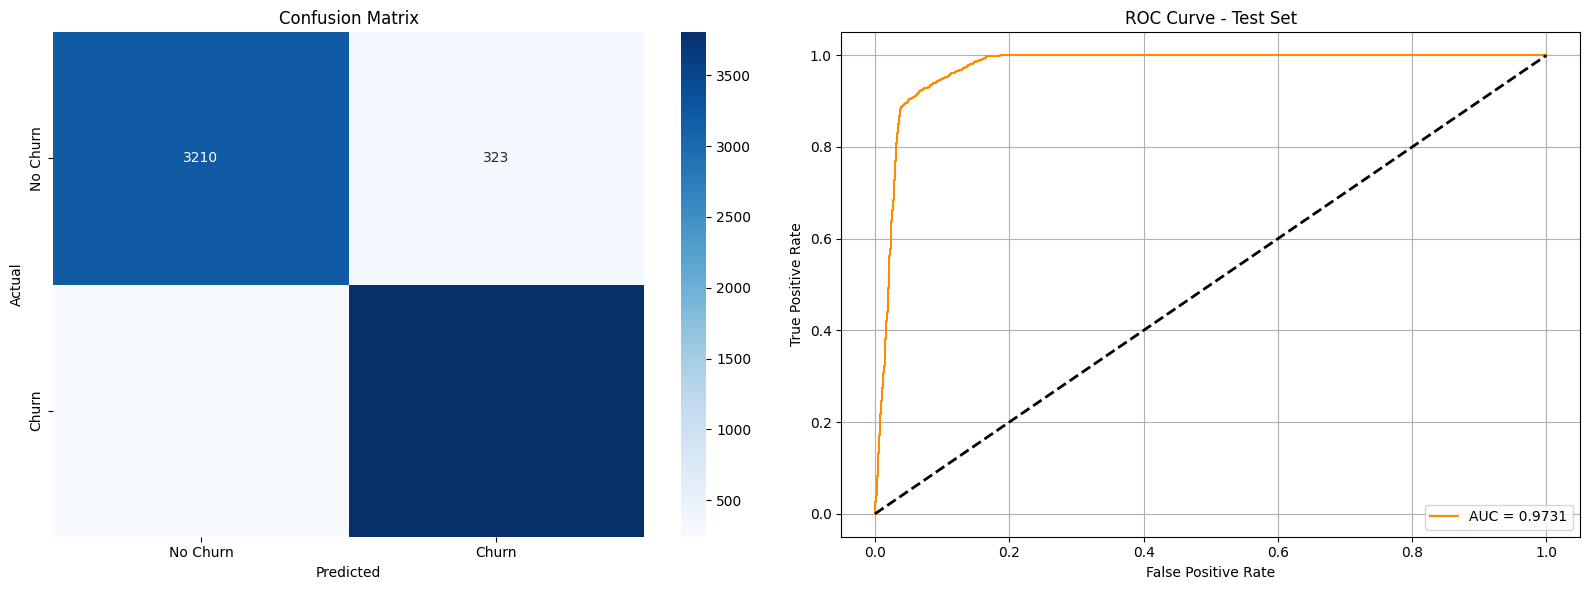

In [92]:
# Step 1: Pull out only the significant features based on t-test results
significant_features = [
    feature for feature in ttest_df_all[ttest_df_all['Significant'] == 'Yes']['Feature']
    if feature in data.columns
]

# Step 2: Prepare the data
X = data[significant_features]
y = data['churn_risk_score']

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Set up the Random Forest model and hyperparameter space for tuning
rf_tt = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Step 5: Randomized search with cross-validation
random_search = RandomizedSearchCV(
    rf_tt,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Step 6: Make predictions and evaluate the model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

rft_acc = accuracy_score(y_test, y_pred)
rft_cr = classification_report(y_test, y_pred, output_dict=True)

print("Best Hyperparameters:\n", random_search.best_params_)
print("\nAccuracy:", rft_acc)
print("\nClassification Report:\n", rft_cr)

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot confusion matrix on axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Step 8: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
rft_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve on axes[1]
axes[1].plot(fpr, tpr, label=f"AUC = {rft_auc:.4f}", color='darkorange')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Test Set")
axes[1].legend()
axes[1].grid(True)

# Display the two plots side by side
plt.tight_layout()
plt.show()


# Logistic Regression using all the features

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Best Parameters:  {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Accuracy:  0.9049881235154394
Confusion Matrix:
 [[3207  326]
 [ 394 3651]]
Classification Report:
 {'0': {'precision': 0.8905859483476812, 'recall': 0.9077271440701953, 'f1-score': 0.8990748528174938, 'support': 3533.0}, '1': {'precision': 0.9180286648227307, 'recall': 0.9025957972805934, 'f1-score': 0.9102468212415856, 'support': 4045.0}, 'accuracy': 0.9049881235154394, 'macro avg': {'precision': 0.904307306585206, 'recall': 0.9051614706753943, 'f1-score': 0.9046608370295397, 'support': 7578.0}, 'weighted avg': {'precision': 0.9052343764476516, 'recall': 0.9049881235154394, 'f1-score': 0.9050382484727394, 'support': 7578.0}}


c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\zoma_\AppData\Local\Progra

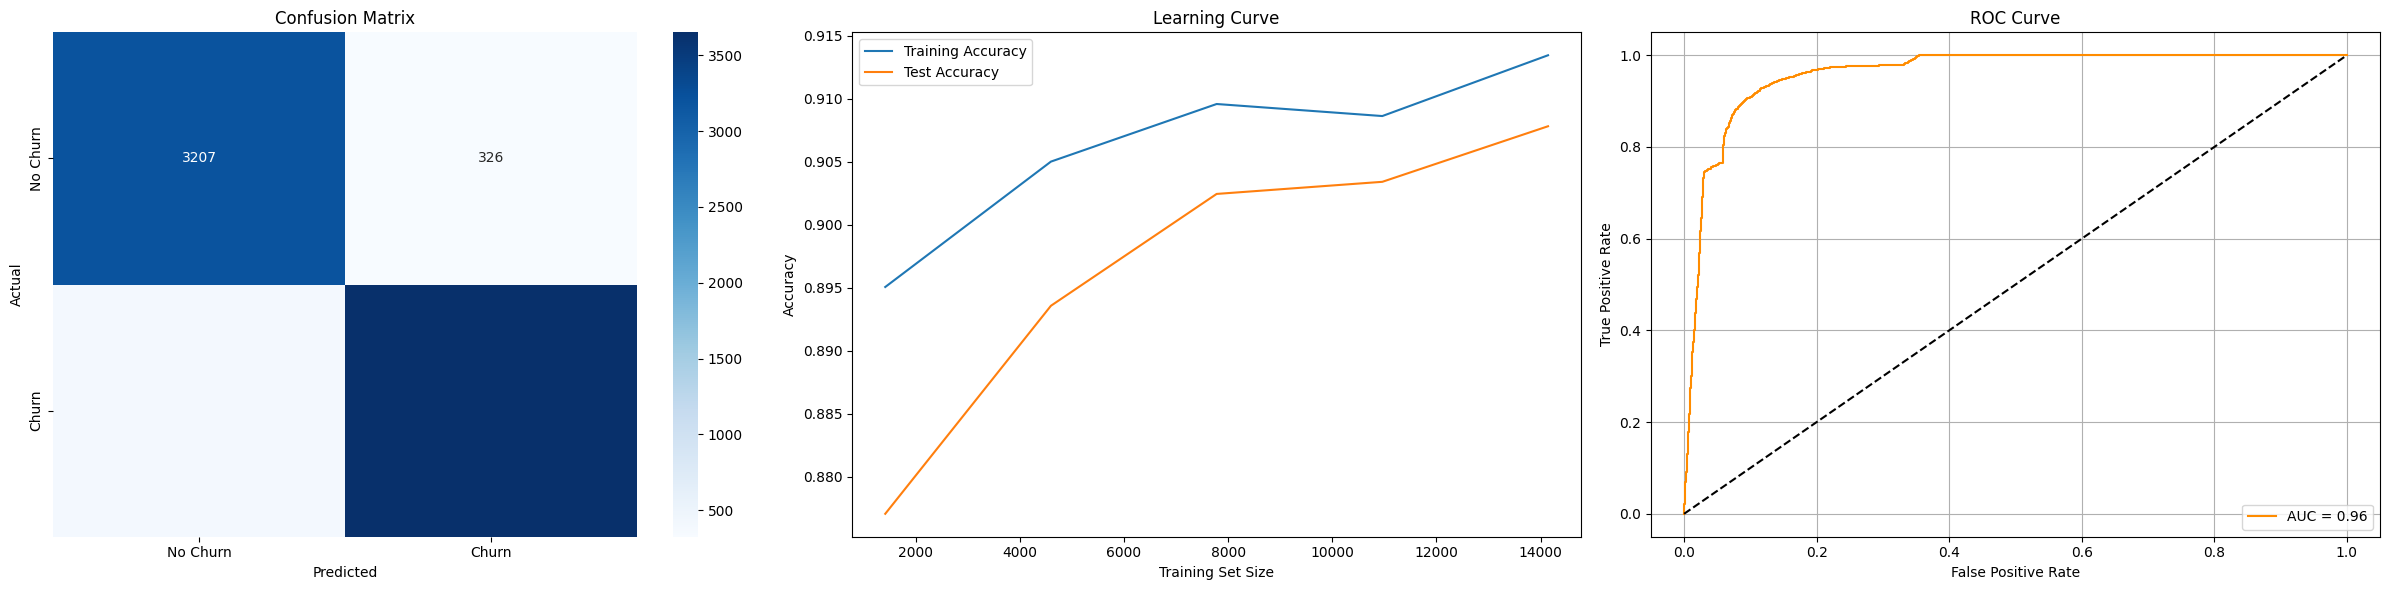

In [93]:
# Step 1: Load and split the data
X = data.drop(columns=['churn_risk_score'])
y = data['churn_risk_score']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the Logistic Regression model
LR = LogisticRegression(random_state=42)

# Step 4: Hyperparameter grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization (more commonly used)
    'solver': ['liblinear', 'saga'],  # Solvers
    'max_iter': [200, 500, 1000]  # Iterations
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(LR, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_LR = grid_search.best_estimator_

# Step 5: Make predictions on the test set using the best model
y_pred = best_LR.predict(X_test)

# Step 6: Calculate accuracy and other evaluation metrics
lga_acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
lga_cr = classification_report(y_test, y_pred, output_dict=True)

# Step 7: Print evaluation metrics
print("Best Parameters: ", grid_search.best_params_)
print("Accuracy: ", lga_acc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", lga_cr)

# plot three graphs horizontally
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Step 8: Plot the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'],
            ax = axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Step 9: Plot the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_LR, X_train, y_train, cv=5)
axes[1].plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
axes[1].plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Learning Curve")
axes[1].legend()

# Step 10: ROC-AUC Curve
y_prob = best_LR.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
lga_auc = roc_auc_score(y_test, y_prob)
axes[2].plot(fpr, tpr, label=f"AUC = {lga_auc:.2f}", color='darkorange')
axes[2].plot([0, 1], [0, 1], 'k--')
axes[2].set_xlabel("False Positive Rate")
axes[2].set_ylabel("True Positive Rate")
axes[2].set_title("ROC Curve")
axes[2].legend(loc='lower right')
axes[2].grid(True)

# Show the plots side by side
plt.tight_layout()
plt.show()


# Logistic Regression using Important Features

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy:  0.9074953813671154
Confusion Matrix:
 [[3233  300]
 [ 401 3644]]
Classification Report:
 {'0': {'precision': 0.8896532746285085, 'recall': 0.9150863288989527, 'f1-score': 0.9021905957862424, 'support': 3533.0}, '1': {'precision': 0.9239350912778904, 'recall': 0.9008652657601978, 'f1-score': 0.9122543497308799, 'support': 4045.0}, 'accuracy': 0.9074953813671154, 'macro avg': {'precision': 0.9067941829531995, 'recall': 0.9079757973295752, 'f1-score': 0.9072224727585612, 'support': 7578.0}, 'weighted avg': {'precision': 0.9079522913013444, 'recall': 0.9074953813671154, 'f1-score': 0.9075624464996309, 'support': 7578.0}}


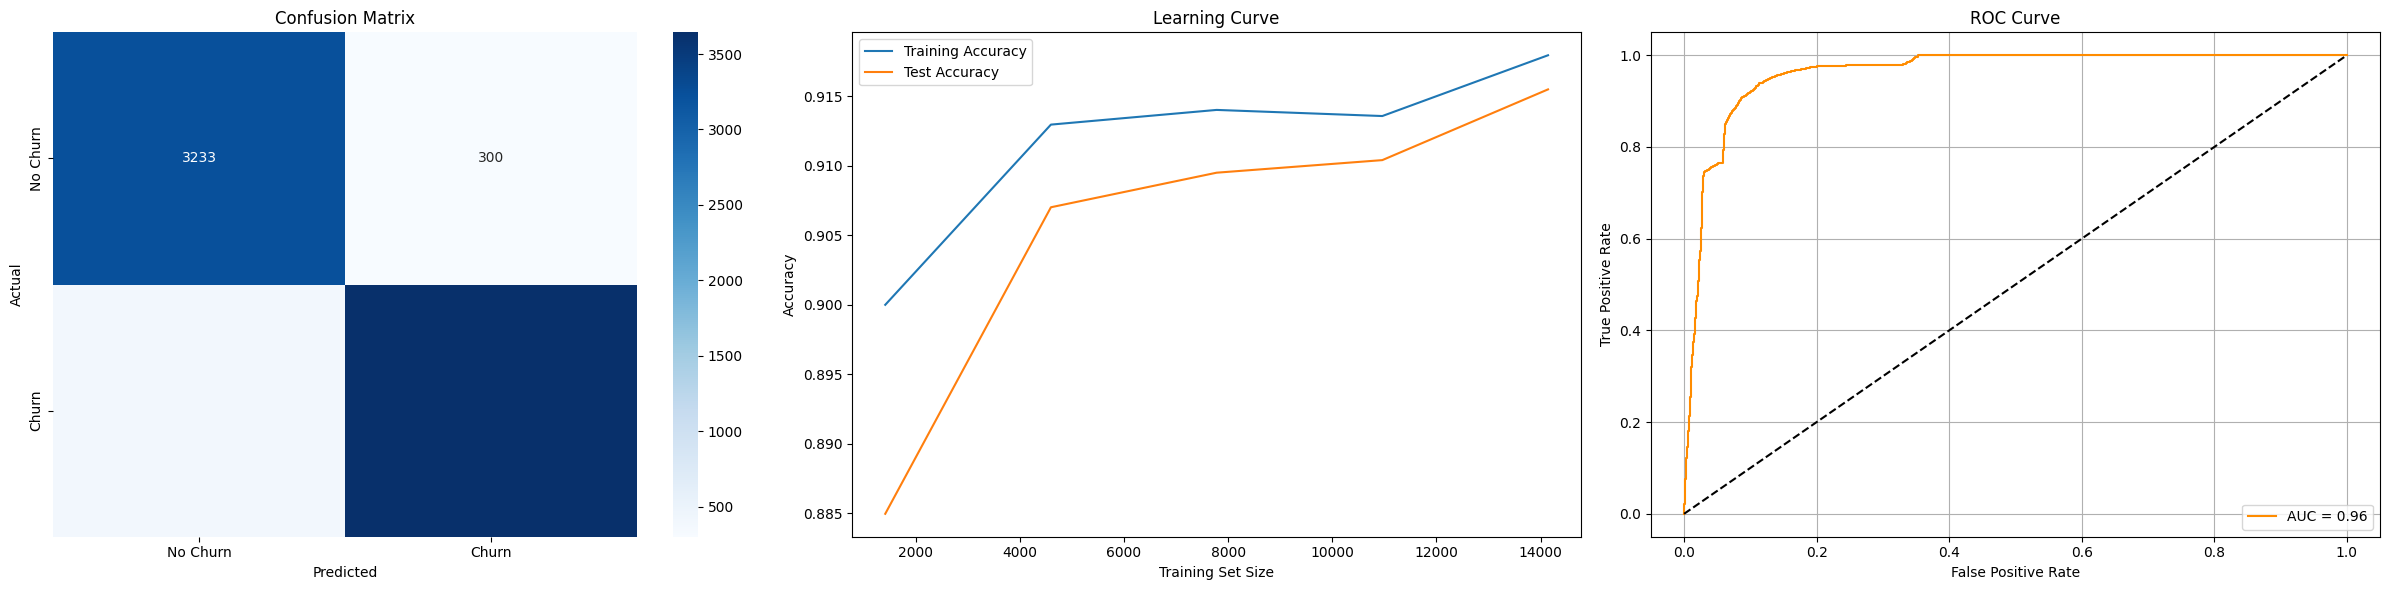

In [94]:
target_column = 'churn_risk_score'
X = data[important_features]
y = data[target_column]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the Logistic Regression model
LR_IF = LogisticRegression(random_state=42)

# Step 4: Hyperparameter grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization (more commonly used)
    'solver': ['liblinear', 'saga'],  # Solvers
    'max_iter': [100, 200]  # Iterations
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(LR_IF, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_LR_IF = grid_search.best_estimator_

# Step 5: Make predictions on the test set using the best model
y_pred = best_LR_IF.predict(X_test)

# Step 6: Calculate accuracy and other evaluation metrics
lgif_acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
lgif_cr = classification_report(y_test, y_pred, output_dict=True)

# Step 7: Print evaluation metrics
print("Best Parameters: ", grid_search.best_params_)
print("Accuracy: ", lgif_acc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", lgif_cr)

# plot three graphs horizontally
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Step 8: Plot the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'],
            ax = axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Step 9: Plot the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_LR_IF, X_train, y_train, cv=5)
axes[1].plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
axes[1].plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Learning Curve")
axes[1].legend()

# Step 10: ROC-AUC Curve
y_prob = best_LR_IF.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
lgif_auc = roc_auc_score(y_test, y_prob)
axes[2].plot(fpr, tpr, label=f"AUC = {lgif_auc:.2f}", color='darkorange')
axes[2].plot([0, 1], [0, 1], 'k--')
axes[2].set_xlabel("False Positive Rate")
axes[2].set_ylabel("True Positive Rate")
axes[2].set_title("ROC Curve")
axes[2].legend(loc='lower right')
axes[2].grid(True)

# Show the plots side by side
plt.tight_layout()
plt.show()

# Logistic Regression using T-Test Statistical Analysis

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:  {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Accuracy:  0.9085510688836105
Confusion Matrix:
 [[3223  310]
 [ 383 3662]]
Classification Report:
 {'0': {'precision': 0.8937881308929562, 'recall': 0.9122558731955845, 'f1-score': 0.9029275808936826, 'support': 3533.0}, '1': {'precision': 0.9219536757301108, 'recall': 0.9053152039555006, 'f1-score': 0.9135586877884495, 'support': 4045.0}, 'accuracy': 0.9085510688836105, 'macro avg': {'precision': 0.9078709033115335, 'recall': 0.9087855385755426, 'f1-score': 0.9082431343410661, 'support': 7578.0}, 'weighted avg': {'precision': 0.9088223917620892, 'recall': 0.9085510688836105, 'f1-score': 0.9086022743997966, 'support': 7578.0}}


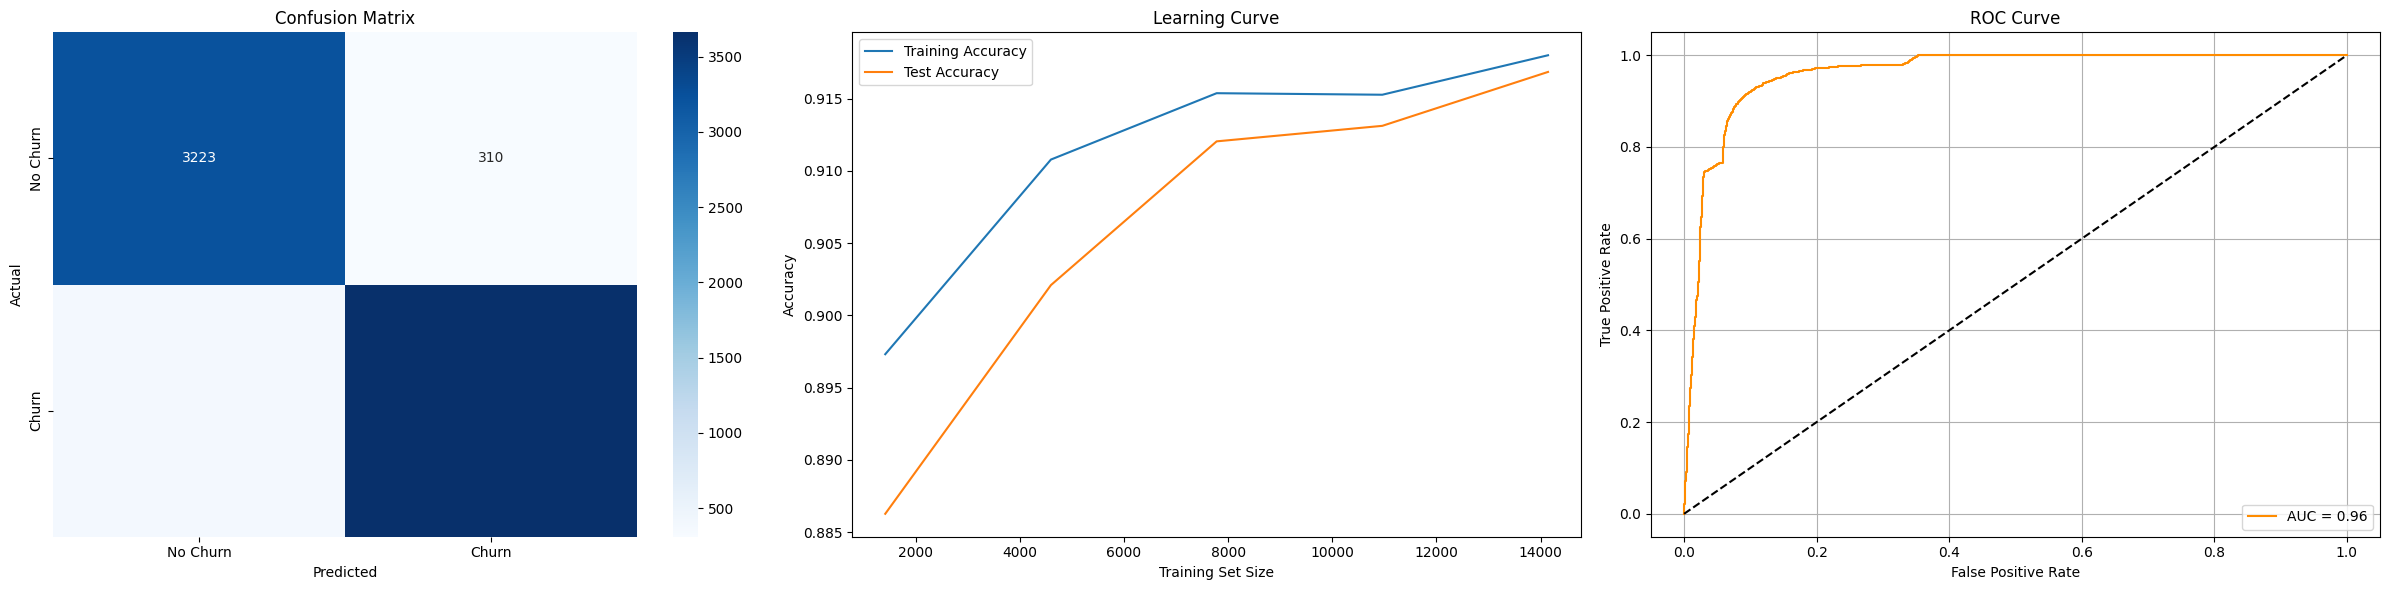

In [95]:
X = data[significant_features]  # Use only the significant features
y = data['churn_risk_score']  # Target column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the Logistic Regression model
LR_tt = LogisticRegression(random_state=42)

# Step 4: Hyperparameter grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization (more commonly used)
    'solver': ['liblinear', 'saga'],  # Solvers
    'max_iter': [500, 1000]  # Iterations
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(LR_tt, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_LR_tt = grid_search.best_estimator_

# Step 5: Make predictions on the test set using the best model
y_pred = best_LR_tt.predict(X_test)

# Step 6: Calculate accuracy and other evaluation metrics
lgt_acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
lgt_cr = classification_report(y_test, y_pred, output_dict=True)

# Step 7: Print evaluation metrics
print("Best Parameters: ", grid_search.best_params_)
print("Accuracy: ", lgt_acc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", lgt_cr)

# plot three graphs horizontally
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Step 8: Plot the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'],
            ax = axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Step 9: Plot the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_LR_tt, X_train, y_train, cv=5)
axes[1].plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
axes[1].plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Learning Curve")
axes[1].legend()

# Step 10: ROC-AUC Curve
y_prob = best_LR_tt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
lgt_auc = roc_auc_score(y_test, y_prob)
axes[2].plot(fpr, tpr, label=f"AUC = {lgt_auc:.2f}", color='darkorange')
axes[2].plot([0, 1], [0, 1], 'k--')
axes[2].set_xlabel("False Positive Rate")
axes[2].set_ylabel("True Positive Rate")
axes[2].set_title("ROC Curve")
axes[2].legend(loc='lower right')
axes[2].grid(True)

# Show the plots side by side
plt.tight_layout()
plt.show()


# XGBoost using all the features

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy: 0.9402
Classification Report:
{'0': {'precision': 0.9494725644889638, 'recall': 0.9192413319601785, 'f1-score': 0.9341124144246282, 'support': 11652.0}, '1': {'precision': 0.9326799255973673, 'recall': 0.958109796428309, 'f1-score': 0.9452238535435925, 'support': 13607.0}, 'accuracy': 0.9401797379151985, 'macro avg': {'precision': 0.9410762450431656, 'recall': 0.9386755641942437, 'f1-score': 0.9396681339841104, 'support': 25259.0}, 'weighted avg': {'precision': 0.940426385408321, 'recall': 0.9401797379151985, 'f1-score': 0.9400981364283395, 'support': 25259.0}}
AUC: 0.9792


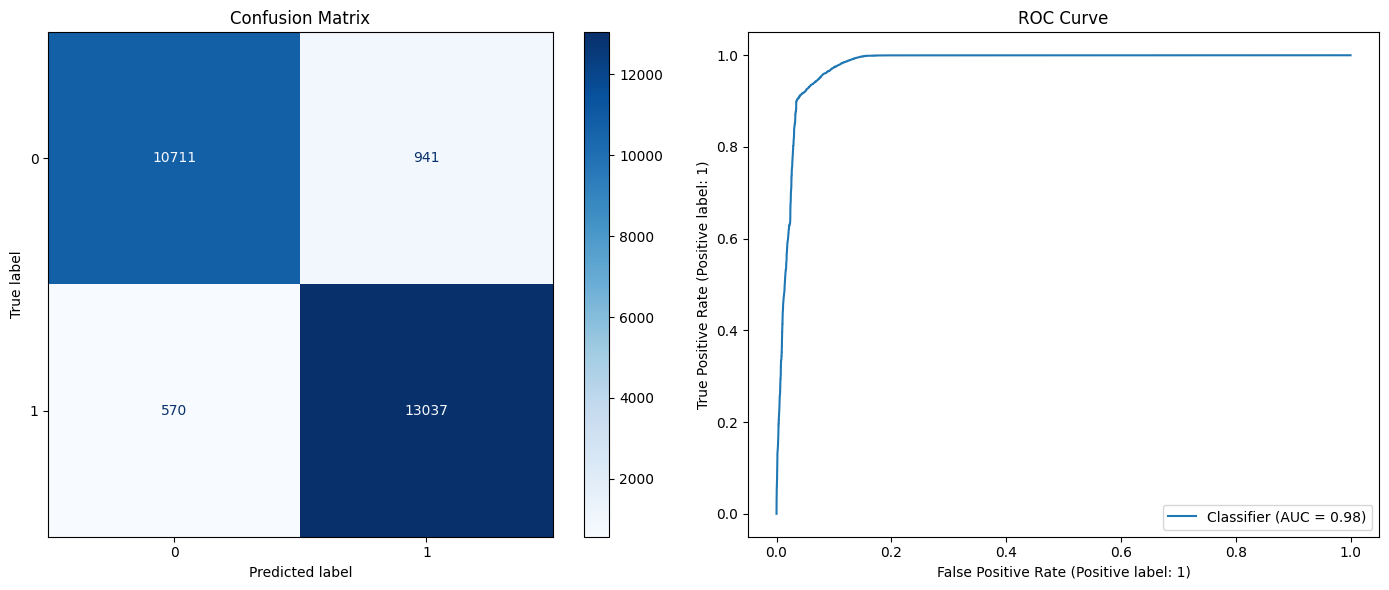


Best Hyperparameters found: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [96]:
# splitting dpendent and independent features
X = data.drop(columns=['churn_risk_score'])
y = data['churn_risk_score']

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the hyperparameter space for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],           # Learning rate options
    'subsample': [0.8, 1.0],                # Fraction of samples to train each tree
    'colsample_bytree': [0.7, 0.8],         # Subsample ratio of columns for each tree
    'reg_lambda': [0, 1],                   # L2 regularization parameter
    'reg_alpha': [0, 0.5],                  # L1 regularization parameter
    'gamma': [0, 0.1],                      # Minimum loss reduction required to make a further partition
}

# Initializing the XGBoost model
xgb = XGBClassifier(random_state=42)

# Running RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)

# Fit the model with the training data
random_search.fit(X, y)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predict the target variable
y_pred = best_model.predict(X)
y_pred_prob = best_model.predict_proba(X)[:, 1]

# Print the accuracy
xga_acc = best_model.score(X, y)
print(f"Accuracy: {xga_acc:.4f}")

# Classification report to see precision, recall, and f1-score
xga_cr = classification_report(y, y_pred, output_dict=True)
print("Classification Report:")
print(xga_cr)

# Calculate the ROC-AUC score
xga_auc = roc_auc_score(y, y_pred_prob)
print(f"AUC: {xga_auc:.4f}")

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# plot Confusion Matrix
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Confusion Matrix')

# plot ROC Curve
RocCurveDisplay.from_predictions(y, y_pred_prob, ax=axes[1])
axes[1].set_title('ROC Curve')

# Show both plots
plt.tight_layout()
plt.show()

# Display the best hyperparameters found by RandomizedSearchCV
print("\nBest Hyperparameters found:", random_search.best_params_)


# XGBoost using Important Features

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Hyperparameters found: {'subsample': 0.9, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.9504
Classification Report:
{'0': {'precision': 0.9606592238171185, 'recall': 0.9304840370751802, 'f1-score': 0.9453308919696574, 'support': 11652.0}, '1': {'precision': 0.9420310599012381, 'recall': 0.967369736165209, 'f1-score': 0.9545322697606962, 'support': 13607.0}, 'accuracy': 0.950354329150006, 'macro avg': {'precision': 0.9513451418591783, 'recall': 0.9489268866201946, 'f1-score': 0.9499315808651767, 'support': 25259.0}, 'weighted avg': {'precision': 0.9506242490990622, 'recall': 0.950354329150006, 'f1-score': 0.9502876656979391, 'support': 25259.0}}
AUC: 0.9850


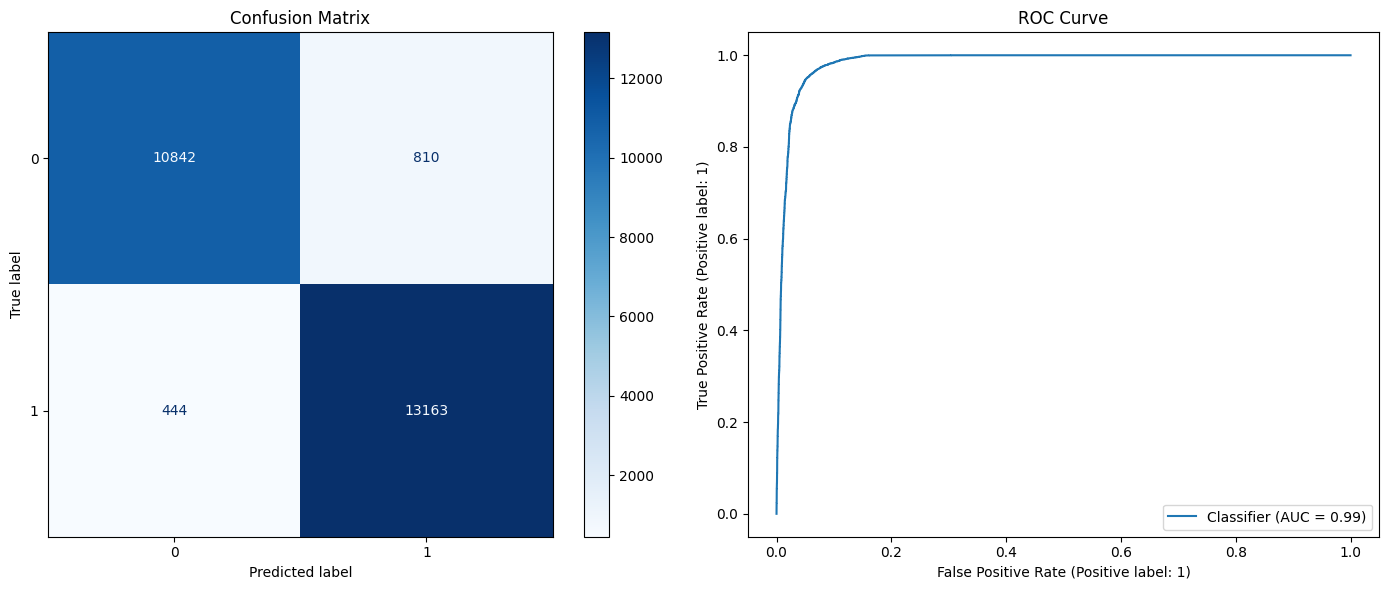

In [97]:
# using these features and target to build the model
target_column = 'churn_risk_score'
X = data[important_features]
y = data[target_column]

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# setting up the hyperparameter search space.
param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5],
}

# Initializing the XGBClassifier with a fixed random state for reproducibility
xgb_IF = XGBClassifier(random_state=42)

# Setting up RandomizedSearchCV to search for the best parameters in the defined range
random_search = RandomizedSearchCV(
    estimator=xgb_IF,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)

# fitting the RandomizedSearchCV to find the best model
random_search.fit(X_train, y_train)

# Printing the best parameters found during the search
print("\nBest Hyperparameters found:", random_search.best_params_)

# Extracting the best model after the search
best_model = random_search.best_estimator_

# Save the best model to a file
with open('./model/best_xgb_model.pkl', 'wb') as f:
    dump(best_model, f)

# Now, I’ll use the best model to predict on the full dataset and get the probabilities
y_pred = best_model.predict(X)
y_pred_prob = best_model.predict_proba(X)[:, 1]

# I’ll evaluate the model’s accuracy and print a detailed classification report
xgif_acc = accuracy_score(y, y_pred)
print(f"Accuracy: {xgif_acc:.4f}")

xgif_cr = classification_report(y, y_pred, output_dict=True)
print("Classification Report:")
print(xgif_cr)

# Calculate AUC
xgif_auc = roc_auc_score(y, y_pred_prob)
print(f"AUC: {xgif_auc:.4f}")

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Confusion Matrix')

# ROC Curve
RocCurveDisplay.from_predictions(y, y_pred_prob, ax=axes[1])
axes[1].set_title('ROC Curve')

# Show both plots
plt.tight_layout()
plt.show()


# XGBoost using T-Test Statistical Analysis

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy: 0.9378
Classification Report:
{'0': {'precision': 0.9550419788751467, 'recall': 0.9079128046687264, 'f1-score': 0.9308812530247701, 'support': 11652.0}, '1': {'precision': 0.9243407135805951, 'recall': 0.9634011905636805, 'f1-score': 0.9434668393968837, 'support': 13607.0}, 'accuracy': 0.937804346965438, 'macro avg': {'precision': 0.9396913462278709, 'recall': 0.9356569976162035, 'f1-score': 0.9371740462108269, 'support': 25259.0}, 'weighted avg': {'precision': 0.938503235581154, 'recall': 0.937804346965438, 'f1-score': 0.9376610967939356, 'support': 25259.0}}
AUC: 0.9780


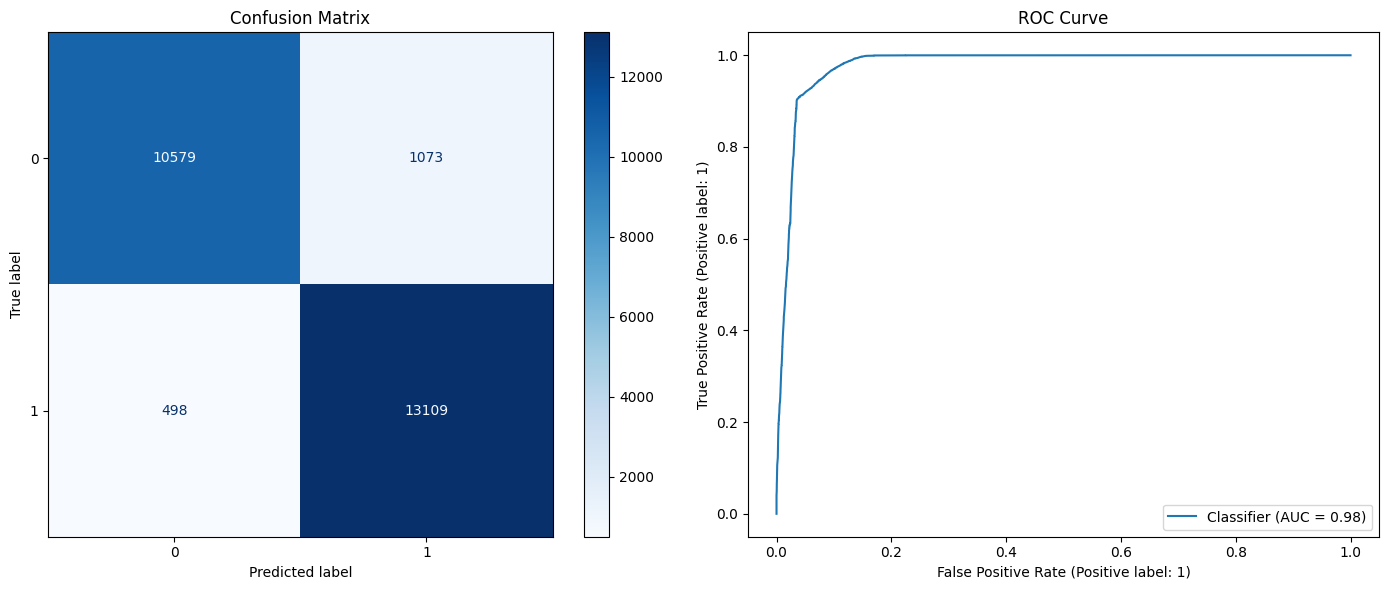


Best Hyperparameters found: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [98]:
# using the most significant features from the dataset
X = data[significant_features]  # Features
y = data['churn_risk_score']  # Target column

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the hyperparameter space for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],           # Learning rate options
    'subsample': [0.8, 1.0],                # Fraction of samples to train each tree
    'colsample_bytree': [0.7, 0.8],         # Subsample ratio of columns for each tree
    'reg_lambda': [0, 1],                   # L2 regularization parameter
    'reg_alpha': [0, 0.5],                  # L1 regularization parameter
    'gamma': [0, 0.1],                      # Minimum loss reduction required to make a further partition
}

# Initializing the XGBoost model
xgb_tt = XGBClassifier(random_state=42)

# Running RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_tt,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)

# Fit the model with the training data
random_search.fit(X, y)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predict the target variable
y_pred = best_model.predict(X)
y_pred_prob = best_model.predict_proba(X)[:, 1]

# Print the accuracy
xgt_acc = best_model.score(X, y)
print(f"Accuracy: {xgt_acc:.4f}")

# Classification report to see precision, recall, and f1-score
xgt_cr = classification_report(y, y_pred, output_dict=True)
print("Classification Report:")
print(xgt_cr)

# Calculate the ROC-AUC score
xgt_auc = roc_auc_score(y, y_pred_prob)
print(f"AUC: {xgt_auc:.4f}")

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# plot Confusion Matrix
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Confusion Matrix')

# plot ROC Curve
RocCurveDisplay.from_predictions(y, y_pred_prob, ax=axes[1])
axes[1].set_title('ROC Curve')

# Show both plots
plt.tight_layout()
plt.show()

# Display the best hyperparameters found by RandomizedSearchCV
print("\nBest Hyperparameters found:", random_search.best_params_)


# Models Comparison

Model  Accuracy  Precision    Recall  \
6              XGBoost (Important Features)  0.950354   0.951345  0.948927   
8                    XGBoost (All Features)  0.940180   0.941076  0.938676   
7                 XGBoost (T-Test Features)  0.937804   0.939691  0.935657   
0        Random Forest (Important Features)  0.927817   0.928100  0.926613   
1           Random Forest (T-Test Features)  0.925442   0.925806  0.924375   
2              Random Forest (All Features)  0.923990   0.924310  0.922943   
4     Logistic Regression (T-Test Features)  0.908551   0.907871  0.908786   
3  Logistic Regression (Important Features)  0.907495   0.906794  0.907976   
5        Logistic Regression (All Features)  0.904988   0.904307  0.905161   

   F1 Score       AUC  
6  0.949932  0.985009  
8  0.939668  0.979207  
7  0.937174  0.978041  
0  0.927264  0.973253  
1  0.924983  0.973073  
2  0.923527  0.972191  
4  0.908243  0.961482  
3  0.907222  0.961995  
5  0.904661  0.960295

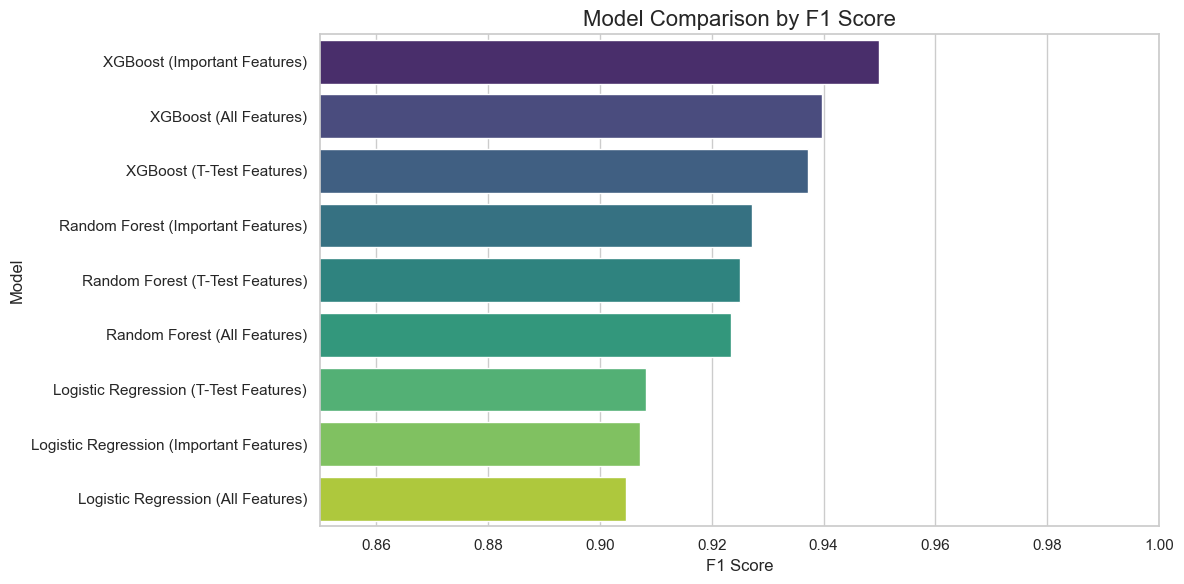

In [99]:
# Create the model comparison data
comparison = [
    ["Random Forest (Important Features)",       rfif_acc, rfif_cr['macro avg']['precision'], rfif_cr['macro avg']['recall'], rfif_cr['macro avg']['f1-score'], rfif_auc],
    ["Random Forest (T-Test Features)",          rft_acc, rft_cr['macro avg']['precision'], rft_cr['macro avg']['recall'], rft_cr['macro avg']['f1-score'], rft_auc],
    ["Random Forest (All Features)",             rfa_acc, rfa_cr['macro avg']['precision'], rfa_cr['macro avg']['recall'], rfa_cr['macro avg']['f1-score'], rfa_auc],
    ["Logistic Regression (Important Features)", lgif_acc, lgif_cr['macro avg']['precision'], lgif_cr['macro avg']['recall'], lgif_cr['macro avg']['f1-score'], lgif_auc],
    ["Logistic Regression (T-Test Features)",    lgt_acc, lgt_cr['macro avg']['precision'], lgt_cr['macro avg']['recall'], lgt_cr['macro avg']['f1-score'], lgt_auc],
    ["Logistic Regression (All Features)",       lga_acc, lga_cr['macro avg']['precision'], lga_cr['macro avg']['recall'], lga_cr['macro avg']['f1-score'], lga_auc],
    ["XGBoost (Important Features)",             xgif_acc, xgif_cr['macro avg']['precision'], xgif_cr['macro avg']['recall'], xgif_cr['macro avg']['f1-score'], xgif_auc],
    ["XGBoost (T-Test Features)",                xgt_acc, xgt_cr['macro avg']['precision'], xgt_cr['macro avg']['recall'], xgt_cr['macro avg']['f1-score'], xgt_auc],
    ["XGBoost (All Features)",                   xga_acc, xga_cr['macro avg']['precision'], xga_cr['macro avg']['recall'], xga_cr['macro avg']['f1-score'], xga_auc],
]

# Define column names
columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

# Create the DataFrame
model_comparison_df = pd.DataFrame(comparison, columns=columns)

# Sort by F1 Score
sorted_df = model_comparison_df.sort_values(by="F1 Score", ascending=False)

# Display the table
display(sorted_df)

# Visualization: F1 Score Comparison
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.barplot(
    x="F1 Score",
    y="Model",
    data=sorted_df,
    palette="viridis"
)

plt.title("Model Comparison by F1 Score", fontsize=16)
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.xlim(0.85, 1.0)
plt.tight_layout()
plt.show()

<a id="thankyou"></a>
## <p style="background-color:#003366;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Thank You, Eng. Aya! 🌟</p>
<p style="font-family:newtimeroman;color:#003366;font-size:120%;text-align:center;">
Your dedication and guidance have truly made a difference in our learning journey. Thank you for inspiring us and sharing your valuable knowledge with such passion and patience!
</p>